In [1]:
import sys
sys.path.append('../src')
from Mapping import *
from PCA import *

import pickle
import matplotlib
import matplotlib.pyplot as plt

In [2]:
V5 = pickle.load(open('../data/V5.p','rb'))
cp_list = V5["cp_list"]
active_L_table_slide_DOA = V5["active_L_table_slide_DOA"]
active_L_table_slide_matrix = V5["active_L_table_slide_matrix"]
active_long_table_slide_DOA = V5["active_long_table_slide_DOA"]
active_long_table_slide_matrix = V5["active_long_table_slide_matrix"]

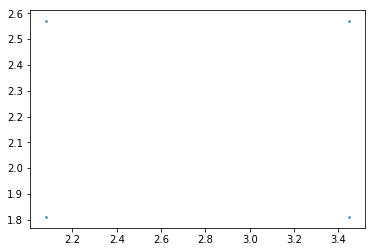

In [3]:
room_x = [i[0] for i in ROOM_COORDINATES[:4]]
room_y = [i[1] for i in ROOM_COORDINATES[:4]]
plt.scatter(room_x, room_y, s=2)

In [4]:
import torch
import torch.nn as nn
import random

In [25]:
input_size = 15
output_size = 2
hidden_size = 200
num_epochs = 2
learning_rate = 0.0001

In [6]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        output = self.l1(x)
        output = self.relu(output)
        output = self.l2(output)
        return output
    

In [26]:
model = NeuralNet(input_size, hidden_size, output_size)
model = model.float()

In [27]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [28]:
# first four are table coordinates
cp_torch = [torch.from_numpy(cp) for cp in cp_list[:4]]
room_coords = [torch.from_numpy(np.array([i[0], i[1]])) for i in ROOM_COORDINATES[:4]]

In [29]:
X = cp_torch
y = room_coords

In [30]:
for i in range(10000):
    for x_i, y_i in zip(X, y):
    
        outputs = model(x_i.float())
        loss = criterion(outputs, y_i.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        print(loss.item())

4.5774664878845215
8.434778213500977
10.042634963989258
6.273571014404297
4.495955944061279
8.324503898620605
9.923312187194824
6.182100296020508
4.415790557861328
8.21579647064209
9.805585861206055
6.092018127441406
4.336945056915283
8.108630180358887
9.689422607421875
6.003297328948975
4.259393692016602
8.002975463867188
9.574798583984375
5.915914058685303
4.183115482330322
7.898807048797607
9.461684226989746
5.829843044281006
4.108083724975586
7.796098709106445
9.350057601928711
5.745063304901123
4.034277439117432
7.694825649261475
9.239889144897461
5.661551475524902
3.9616754055023193
7.594961643218994
9.131156921386719
5.57928466796875
3.8902552127838135
7.496482849121094
9.023835182189941
5.498241424560547
3.819995880126953
7.399366855621338
8.917900085449219
5.418401718139648
3.7508769035339355
7.303591251373291
8.81333065032959
5.33974552154541
3.6828789710998535
7.209132671356201
8.710104942321777
5.262250900268555
3.615983009338379
7.115969181060791
8.608198165893555
5.185899

2.8208303451538086
1.2440476417541504
0.40685033798217773
2.0253803730010986
2.790001630783081
1.2266005277633667
0.3954933285713196
2.000778913497925
2.759542942047119
1.2094314098358154
0.38437697291374207
1.9765126705169678
2.7294507026672363
1.1925357580184937
0.3734973967075348
1.952578067779541
2.6997203826904297
1.1759103536605835
0.36285099387168884
1.9289705753326416
2.6703481674194336
1.1595511436462402
0.3524341285228729
1.9056851863861084
2.641329526901245
1.1434545516967773
0.3422432839870453
1.8827189207077026
2.6126601696014404
1.1276167631149292
0.3322749435901642
1.8600674867630005
2.584336280822754
1.112034559249878
0.3225255310535431
1.8377265930175781
2.556354522705078
1.096704125404358
0.3129917085170746
1.8156923055648804
2.528709888458252
1.0816220045089722
0.30366989970207214
1.7939611673355103
2.5013997554779053
1.0667846202850342
0.2945570945739746
1.7725292444229126
2.474419116973877
1.0521888732910156
0.28564968705177307
1.7513926029205322
2.4477643966674805

0.6641985177993774
0.970846951007843
0.3818308711051941
0.011244197376072407
0.6588257551193237
0.9625636339187622
0.379327654838562
0.011603156104683876
0.6535308957099915
0.9543808102607727
0.3768750727176666
0.0119902603328228
0.648313045501709
0.9462972283363342
0.37447232007980347
0.012404706329107285
0.6431710124015808
0.9383118152618408
0.3721184730529785
0.01284567080438137
0.6381038427352905
0.9304233193397522
0.36981266736984253
0.01331250835210085
0.6331102252006531
0.9226301908493042
0.3675539791584015
0.013804411515593529
0.6281892657279968
0.9149317741394043
0.3653413951396942
0.014320676214993
0.6233394145965576
0.9073259830474854
0.3631744086742401
0.014860603958368301
0.6185603141784668
0.8998125195503235
0.361052006483078
0.015423507429659367
0.6138505339622498
0.8923899531364441
0.3589732348918915
0.016008684411644936
0.6092090606689453
0.8850563764572144
0.3569374978542328
0.01661548763513565
0.6046347618103027
0.8778119087219238
0.35494378209114075
0.01724324561655

0.27702921628952026
0.10809801518917084
0.36955156922340393
0.4693027138710022
0.2767946124076843
0.10904183238744736
0.36832916736602783
0.4668925404548645
0.27656540274620056
0.10998079925775528
0.3671222925186157
0.464508593082428
0.2763414680957794
0.11091470718383789
0.3659307360649109
0.462150514125824
0.2761226296424866
0.11184341460466385
0.3647540509700775
0.4598178565502167
0.27590876817703247
0.11276717483997345
0.3635922372341156
0.45751047134399414
0.2756998538970947
0.1136857345700264
0.3624448776245117
0.4552278518676758
0.2754954397678375
0.11459900438785553
0.36131176352500916
0.4529697299003601
0.27529579401016235
0.11550704389810562
0.3601929545402527
0.45073604583740234
0.27510058879852295
0.11640974879264832
0.35908791422843933
0.44852620363235474
0.27490970492362976
0.11730709671974182
0.35799676179885864
0.44634005427360535
0.27472296357154846
0.11819921433925629
0.35691893100738525
0.44417712092399597
0.27454039454460144
0.119085893034935
0.35585424304008484
0.4

0.2656311094760895
0.17740632593631744
0.2947482764720917
0.31425344944000244
0.26555877923965454
0.1777949184179306
0.29434821009635925
0.3134080171585083
0.26548609137535095
0.17817923426628113
0.2939513921737671
0.3125702440738678
0.26541316509246826
0.17855921387672424
0.293557733297348
0.3117397427558899
0.2653401494026184
0.17893491685390472
0.2931675314903259
0.31091687083244324
0.26526689529418945
0.17930655181407928
0.2927801311016083
0.3101012408733368
0.26519331336021423
0.1796739101409912
0.29239609837532043
0.30929282307624817
0.2651195228099823
0.1800369918346405
0.29201504588127136
0.3084915280342102
0.2650453746318817
0.1803959757089615
0.2916370630264282
0.3076973259449005
0.2649710178375244
0.18075089156627655
0.29126209020614624
0.3069102168083191
0.26489633321762085
0.18110162019729614
0.29089006781578064
0.30612996220588684
0.2648213505744934
0.18144835531711578
0.29052093625068665
0.30535638332366943
0.2647462487220764
0.18179118633270264
0.2901546359062195
0.3045

0.26467007398605347
0.25477784872055054
0.25603997707366943
0.19971096515655518
0.26445814967155457
0.25440749526023865
0.2559305429458618
0.19978469610214233
0.26424703001976013
0.2540396749973297
0.2558206617832184
0.19985663890838623
0.2640368342399597
0.25367429852485657
0.2557106614112854
0.1999266892671585
0.26382747292518616
0.2533113360404968
0.2556001543998718
0.19999514520168304
0.26361900568008423
0.2529507577419281
0.25548943877220154
0.20006167888641357
0.26341134309768677
0.2525924742221832
0.25537848472595215
0.2001265287399292
0.26320433616638184
0.2522365152835846
0.25526726245880127
0.2001895010471344
0.26299840211868286
0.2518829107284546
0.25515568256378174
0.20025095343589783
0.26279303431510925
0.2515316307544708
0.25504380464553833
0.2003105878829956
0.2625886797904968
0.2511824667453766
0.254931777715683
0.20036855340003967
0.26238495111465454
0.2508357763290405
0.25481921434402466
0.20042479038238525
0.2621820867061615
0.25049132108688354
0.25470662117004395
0.

0.24348866939544678
0.20015482604503632
0.24580876529216766
0.2257051169872284
0.24336054921150208
0.20010891556739807
0.24565254151821136
0.22549621760845184
0.24323250353336334
0.2000621259212494
0.2454964518547058
0.2252880483865738
0.2431042492389679
0.2000148445367813
0.24534070491790771
0.22508081793785095
0.24297602474689484
0.19996681809425354
0.24518528580665588
0.22487448155879974
0.24284765124320984
0.19991827011108398
0.2450302690267563
0.22466900944709778
0.24271921813488007
0.19986899197101593
0.24487538635730743
0.22446438670158386
0.2425907403230667
0.19981923699378967
0.24472086131572723
0.2242605984210968
0.2424621284008026
0.19976867735385895
0.2445666790008545
0.22405755519866943
0.24233360588550568
0.1997176855802536
0.24441280961036682
0.22385555505752563
0.24220474064350128
0.19966602325439453
0.24425913393497467
0.22365418076515198
0.2420760542154312
0.1996137946844101
0.2441057562828064
0.22345368564128876
0.2419472187757492
0.19956104457378387
0.24395276606082

0.2299964427947998
0.19291090965270996
0.23084622621536255
0.20755305886268616
0.22986681759357452
0.19282512366771698
0.23071232438087463
0.2074047178030014
0.22973722219467163
0.19273918867111206
0.2305787205696106
0.20725655555725098
0.22960764169692993
0.19265292584896088
0.23044514656066895
0.20710889995098114
0.2294781506061554
0.19256657361984253
0.23031184077262878
0.2069614827632904
0.22934852540493011
0.19247998297214508
0.23017865419387817
0.2068144679069519
0.2292190045118332
0.19239328801631927
0.23004567623138428
0.20666788518428802
0.2290896326303482
0.1923063099384308
0.2299126237630844
0.20652155578136444
0.22896017134189606
0.19221913814544678
0.22978001832962036
0.20637556910514832
0.22883076965808868
0.19213204085826874
0.22964726388454437
0.20622998476028442
0.22870145738124847
0.19204455614089966
0.22951482236385345
0.2060847282409668
0.2285720854997635
0.19195690751075745
0.22938255965709686
0.20593984425067902
0.2284429371356964
0.1918691247701645
0.229250282049

0.21674756705760956
0.18333381414413452
0.21763552725315094
0.19365401566028595
0.2166229784488678
0.1832381933927536
0.21751464903354645
0.19353234767913818
0.21649861335754395
0.18314248323440552
0.21739384531974792
0.19341066479682922
0.21637417376041412
0.18304680287837982
0.2172730267047882
0.1932893544435501
0.21624989807605743
0.18295107781887054
0.21715247631072998
0.19316799938678741
0.21612563729286194
0.18285533785820007
0.2170318067073822
0.1930469423532486
0.21600136160850525
0.18275970220565796
0.21691136062145233
0.19292603433132172
0.21587732434272766
0.18266384303569794
0.21679110825061798
0.1928054392337799
0.21575315296649933
0.18256798386573792
0.21667084097862244
0.1926848143339157
0.21562917530536652
0.18247218430042267
0.21655067801475525
0.19256454706192017
0.21550531685352325
0.18237634003162384
0.2164306342601776
0.19244423508644104
0.2153814136981964
0.182280495762825
0.21631067991256714
0.19232428073883057
0.2152576446533203
0.1821846067905426
0.216190725564

0.20415855944156647
0.1733730137348175
0.20556312799453735
0.18179675936698914
0.20404113829135895
0.1732780635356903
0.20545172691345215
0.18168950080871582
0.20392383635044098
0.17318306863307953
0.20534034073352814
0.1815822422504425
0.20380645990371704
0.1730882227420807
0.20522910356521606
0.1814751923084259
0.2036893367767334
0.17299336194992065
0.20511791110038757
0.18136820197105408
0.20357216894626617
0.1728985607624054
0.20500683784484863
0.1812613606452942
0.20345519483089447
0.17280374467372894
0.20489586889743805
0.18115462362766266
0.20333807170391083
0.17270894348621368
0.20478487014770508
0.18104799091815948
0.20322123169898987
0.1726141721010208
0.20467406511306763
0.18094147741794586
0.20310445129871368
0.17251946032047272
0.20456327497959137
0.18083502352237701
0.20298756659030914
0.17242485284805298
0.20445258915424347
0.1807287037372589
0.20287097990512848
0.17233018577098846
0.20434190332889557
0.18062253296375275
0.20275431871414185
0.17223553359508514
0.20423129

0.17126421630382538
0.19233012199401855
0.16369742155075073
0.1943971961736679
0.17116659879684448
0.19222010672092438
0.1636066436767578
0.194293811917305
0.17106907069683075
0.19211016595363617
0.16351589560508728
0.19419050216674805
0.17097161710262299
0.19200026988983154
0.16342522203922272
0.19408723711967468
0.1708742380142212
0.19189035892486572
0.16333459317684174
0.19398407638072968
0.17077697813510895
0.19178061187267303
0.16324397921562195
0.19388097524642944
0.17067979276180267
0.1916709542274475
0.16315339505672455
0.19377781450748444
0.17058271169662476
0.19156134128570557
0.16306287050247192
0.19367489218711853
0.1704856902360916
0.1914518028497696
0.16297243535518646
0.19357198476791382
0.17038875818252563
0.19134238362312317
0.1628820300102234
0.19346919655799866
0.17029187083244324
0.19123297929763794
0.1627916544675827
0.1933663934469223
0.1701951026916504
0.19112366437911987
0.1627013385295868
0.19326378405094147
0.17009839415550232
0.1910143792629242
0.162611111998

0.1615249216556549
0.18125556409358978
0.154518261551857
0.18401828408241272
0.16143503785133362
0.18115264177322388
0.15443259477615356
0.18392202258110046
0.16134525835514069
0.18104970455169678
0.15434709191322327
0.18382586538791656
0.1612556129693985
0.1809469610452652
0.15426164865493774
0.18372982740402222
0.16116592288017273
0.18084417283535004
0.15417616069316864
0.18363377451896667
0.16107645630836487
0.18074160814285278
0.1540907323360443
0.18353770673274994
0.16098691523075104
0.1806388944387436
0.15400531888008118
0.1834418922662735
0.16089755296707153
0.18053631484508514
0.15392009913921356
0.18334601819515228
0.16080814599990845
0.18043383955955505
0.1538347750902176
0.18325024843215942
0.16071881353855133
0.18033145368099213
0.15374962985515594
0.1831546425819397
0.16062963008880615
0.1802290827035904
0.1536644548177719
0.18305887281894684
0.16054049134254456
0.18012678623199463
0.15357927978038788
0.18296335637569427
0.16045145690441132
0.1800246238708496
0.15349429845

0.17444664239883423
0.15253566205501556
0.17089684307575226
0.14589138329029083
0.17435696721076965
0.15245255827903748
0.17080053687095642
0.14581114053726196
0.17426735162734985
0.15236952900886536
0.17070427536964417
0.14573098719120026
0.17417789995670319
0.1522865742444992
0.17060817778110504
0.14565083384513855
0.17408843338489532
0.15220366418361664
0.17051205039024353
0.145570769906044
0.17399898171424866
0.15212081372737885
0.17041605710983276
0.14549073576927185
0.17390970885753632
0.15203794836997986
0.17032010853290558
0.14541073143482208
0.17382043600082397
0.1519552618265152
0.17022423446178436
0.14533087611198425
0.17373113334178925
0.15187259018421173
0.17012839019298553
0.14525103569030762
0.17364196479320526
0.15178991854190826
0.17003272473812103
0.14517123997211456
0.17355290055274963
0.1517074555158615
0.16993705928325653
0.14509150385856628
0.1734638512134552
0.15162497758865356
0.16984139382839203
0.1450117826461792
0.17337483167648315
0.1515425443649292
0.169745

0.16544684767723083
0.14421364665031433
0.16121172904968262
0.13782012462615967
0.16536326706409454
0.14413656294345856
0.1611216515302658
0.13774515688419342
0.16527996957302094
0.14405971765518188
0.16103176772594452
0.1376701444387436
0.16519668698310852
0.14398281276226044
0.16094179451465607
0.1375952959060669
0.1651134043931961
0.14390604197978973
0.16085194051265717
0.13752049207687378
0.16503025591373444
0.14382928609848022
0.16076220571994781
0.13744570314884186
0.16494698822498322
0.1437525600194931
0.16067248582839966
0.13737107813358307
0.16486388444900513
0.14367589354515076
0.16058288514614105
0.13729633390903473
0.1647808998823166
0.14359930157661438
0.16049323976039886
0.13722170889377594
0.16469788551330566
0.14352276921272278
0.16040363907814026
0.1371471881866455
0.16461493074893951
0.14344635605812073
0.1603141874074936
0.1370725929737091
0.1645321398973465
0.1433698982000351
0.1602247804403305
0.13699813187122345
0.1644493192434311
0.14329352974891663
0.16013537347

0.13035622239112854
0.15707215666770935
0.13650210201740265
0.15215639770030975
0.13028624653816223
0.1569945514202118
0.13643072545528412
0.1520722359418869
0.1302163302898407
0.15691687166690826
0.13635946810245514
0.1519882082939148
0.13014641404151917
0.15683940052986145
0.13628818094730377
0.15190410614013672
0.130076602101326
0.15676188468933105
0.13621699810028076
0.15182019770145416
0.130006805062294
0.15668447315692902
0.13614585995674133
0.15173621475696564
0.129937082529068
0.15660706162452698
0.13607481122016907
0.15165236592292786
0.12986735999584198
0.1565297245979309
0.1360037922859192
0.15156860649585724
0.1297978013753891
0.15645231306552887
0.13593284785747528
0.15148478746414185
0.12972813844680786
0.15637515485286713
0.13586187362670898
0.15140113234519958
0.12965862452983856
0.1562979817390442
0.13579100370407104
0.15131740272045135
0.12958909571170807
0.1562209278345108
0.13572028279304504
0.15123388171195984
0.129519522190094
0.1561439335346222
0.1356495022773742

0.14377190172672272
0.12332048267126083
0.14927132427692413
0.12935255467891693
0.14369326829910278
0.12325511872768402
0.1491989642381668
0.12928640842437744
0.14361459016799927
0.12318985164165497
0.1491265594959259
0.12922021746635437
0.14353607594966888
0.12312454730272293
0.14905428886413574
0.12915417551994324
0.14345750212669373
0.12305940687656403
0.1489819586277008
0.12908805906772614
0.1433790624141693
0.12299421429634094
0.14890970289707184
0.12902210652828217
0.14330054819583893
0.12292906641960144
0.14883758127689362
0.12895609438419342
0.14322224259376526
0.1228640004992485
0.14876538515090942
0.128890261054039
0.14314399659633636
0.12279894948005676
0.14869338274002075
0.1288243532180786
0.1430656760931015
0.12273397296667099
0.1486213058233261
0.12875859439373016
0.14298753440380096
0.1226690262556076
0.1485493779182434
0.12869279086589813
0.14290930330753326
0.12260422855615616
0.14847742021083832
0.1286269873380661
0.1428312361240387
0.12253932654857635
0.148405522108

0.1420592963695526
0.12278047204017639
0.13585856556892395
0.11674986779689789
0.14199165999889374
0.12271897494792938
0.1357850879430771
0.11668882519006729
0.14192409813404083
0.12265755236148834
0.1357116997241974
0.11662781983613968
0.14185650646686554
0.12259622663259506
0.13563820719718933
0.11656695604324341
0.14178895950317383
0.122534841299057
0.1355648636817932
0.11650604754686356
0.1417214721441269
0.1224735677242279
0.1354915052652359
0.1164451614022255
0.14165405929088593
0.12241236120462418
0.13541826605796814
0.11638439446687698
0.14158666133880615
0.12235105037689209
0.13534507155418396
0.11632359027862549
0.14151936769485474
0.12228993326425552
0.1352718323469162
0.11626278609037399
0.14145207405090332
0.12222878634929657
0.13519872725009918
0.11620212346315384
0.1413848102092743
0.12216776609420776
0.13512566685676575
0.11614146083593369
0.14131766557693481
0.12210676074028015
0.13505256175994873
0.11608076095581055
0.14125050604343414
0.12204574048519135
0.1349796354

0.1285358965396881
0.11067010462284088
0.13525480031967163
0.11662083864212036
0.1284671574831009
0.11061309278011322
0.13519154489040375
0.11656387150287628
0.1283985674381256
0.11055606603622437
0.135128453373909
0.11650685220956802
0.1283300369977951
0.1104990765452385
0.1350652575492859
0.11644994467496872
0.12826143205165863
0.11044216901063919
0.13500216603279114
0.1163930669426918
0.1281929463148117
0.11038534343242645
0.13493910431861877
0.11633624136447906
0.12812450528144836
0.11032847315073013
0.13487617671489716
0.11627936363220215
0.1280561238527298
0.11027173697948456
0.13481318950653076
0.11622253060340881
0.12798777222633362
0.110214963555336
0.13475017249584198
0.11616585403680801
0.12791942059993744
0.11015823483467102
0.13468725979328156
0.11610918492078781
0.1278511881828308
0.11010155081748962
0.1346244066953659
0.11605250835418701
0.12778295576572418
0.11004486680030823
0.134561687707901
0.11599595099687576
0.12771481275558472
0.1099882423877716
0.1344988495111465

0.12895482778549194
0.11095879971981049
0.12163194268941879
0.10493617504835129
0.12889571487903595
0.11090590804815292
0.12156786769628525
0.10488293319940567
0.12883661687374115
0.11085297167301178
0.1215038076043129
0.10482969880104065
0.12877754867076874
0.11080013960599899
0.12143976986408234
0.10477647930383682
0.12871861457824707
0.11074735969305038
0.12137578427791595
0.10472337156534195
0.12865965068340302
0.1106945052742958
0.12131194770336151
0.10467027127742767
0.12860073149204254
0.1106417179107666
0.12124806642532349
0.1046171709895134
0.1285417675971985
0.11058904230594635
0.12118411809206009
0.10456410050392151
0.12848292291164398
0.11053640395402908
0.12112031131982803
0.10451111942529678
0.12842410802841187
0.11048378795385361
0.12105654180049896
0.1044582724571228
0.12836529314517975
0.11043110489845276
0.12099286168813705
0.10440532118082047
0.12830662727355957
0.11037858575582504
0.12092921137809753
0.1043524220585823
0.1282479614019394
0.11032602190971375
0.120865

0.11524902284145355
0.09963138401508331
0.12300565093755722
0.10565241426229477
0.11518915742635727
0.09958168119192123
0.12295032292604446
0.10560332983732224
0.11512939631938934
0.09953192621469498
0.12289509922266006
0.10555428266525269
0.11506955325603485
0.09948216378688812
0.12283992767333984
0.10550521314144135
0.11500976234674454
0.09943247586488724
0.12278468161821365
0.10545622557401657
0.11495005339384079
0.09938288480043411
0.1227295845746994
0.10540729761123657
0.1148904412984848
0.09933322668075562
0.12267449498176575
0.1053583100438118
0.11483079195022583
0.0992835983633995
0.1226193904876709
0.10530945658683777
0.11477121710777283
0.09923410415649414
0.12256436794996262
0.10526061803102493
0.11471164971590042
0.0991845354437828
0.12250929325819016
0.1052117645740509
0.11465222388505936
0.09913500398397446
0.12245436012744904
0.10516298562288284
0.11459274590015411
0.09908561408519745
0.1223994791507721
0.10511424392461777
0.11453332006931305
0.09903617948293686
0.122344

0.09467237442731857
0.1174934133887291
0.10077555477619171
0.10923333466053009
0.09462588280439377
0.11744173616170883
0.10073000192642212
0.1091776043176651
0.09457936882972717
0.11738999933004379
0.10068447887897491
0.10912177711725235
0.09453295171260834
0.11733834445476532
0.10063890367746353
0.10906600952148438
0.09448651969432831
0.11728666722774506
0.1005934402346611
0.10901027917861938
0.09444016218185425
0.11723510921001434
0.10054793208837509
0.1089545413851738
0.0943937823176384
0.11718348413705826
0.10050258785486221
0.10889890044927597
0.09434744715690613
0.11713198572397232
0.10045715421438217
0.10884326696395874
0.09430117160081863
0.11708040535449982
0.10041186213493347
0.10878773778676987
0.09425489604473114
0.11702895909547806
0.1003664955496788
0.10873211920261383
0.09420866519212723
0.1169775128364563
0.1003212258219719
0.10867659002542496
0.09416240453720093
0.11692602932453156
0.10027596354484558
0.10862118005752563
0.09411618858575821
0.11687460541725159
0.100230

0.11233463138341904
0.09625181555747986
0.10367542505264282
0.0899958610534668
0.11228620260953903
0.09620954096317291
0.10362330079078674
0.0899524837732315
0.1122378408908844
0.09616731107234955
0.10357125103473663
0.08990906924009323
0.11218948662281036
0.09612514078617096
0.10351920127868652
0.08986575156450272
0.11214113980531693
0.09608292579650879
0.10346719622612
0.08982238918542862
0.11209289729595184
0.09604088962078094
0.10341525822877884
0.0897790789604187
0.11204453557729721
0.09599874913692474
0.10336337238550186
0.08973586559295654
0.11199628561735153
0.09595660865306854
0.10331149399280548
0.08969258517026901
0.11194813996553421
0.0959145799279213
0.1032596156001091
0.08964944630861282
0.11189993470907211
0.09587250649929047
0.10320782661437988
0.08960622549057007
0.11185180395841599
0.0958305075764656
0.1031559631228447
0.08956309407949448
0.11180368065834045
0.09578865021467209
0.10310423374176025
0.08951996266841888
0.11175558716058731
0.09574668109416962
0.103052549

0.09205806255340576
0.09848804771900177
0.08567187935113907
0.10746131837368011
0.09201885759830475
0.09843944013118744
0.08563131839036942
0.10741591453552246
0.09197965264320374
0.09839088469743729
0.08559083193540573
0.10737068206071854
0.09194057434797287
0.09834224730730057
0.08555031567811966
0.10732542723417282
0.0919015109539032
0.09829370677471161
0.08550991117954254
0.10728013515472412
0.09186239540576935
0.09824525564908981
0.08546943962574005
0.10723495483398438
0.09182335436344147
0.09819673001766205
0.08542906492948532
0.10718977451324463
0.09178438782691956
0.09814827144145966
0.0853886604309082
0.10714471340179443
0.09174544364213943
0.09809984266757965
0.08534827828407288
0.1070995181798935
0.09170648455619812
0.0980515405535698
0.0853080004453659
0.10705442726612091
0.091667540371418
0.09800313413143158
0.08526773005723953
0.10700938105583191
0.09162867814302444
0.09795480221509933
0.08522742986679077
0.10696437954902649
0.09158987551927567
0.09790647774934769
0.08518

0.09364244341850281
0.08164073526859283
0.10293912887573242
0.0881374329328537
0.09359699487686157
0.0816030278801918
0.10289666801691055
0.08810119330883026
0.09355157613754272
0.081565260887146
0.10285414010286331
0.08806498348712921
0.09350616484880447
0.08152761310338974
0.10281172394752502
0.08802884817123413
0.09346078336238861
0.08148996531963348
0.10276929289102554
0.08799269050359726
0.09341544657945633
0.08145225793123245
0.10272684693336487
0.08795663714408875
0.09337013214826584
0.08141468465328217
0.10268451273441315
0.08792051672935486
0.09332481771707535
0.08137711882591248
0.10264208912849426
0.08788441121578217
0.09327960014343262
0.08133955299854279
0.10259981453418732
0.08784841746091843
0.0932343453168869
0.08130203932523727
0.10255754739046097
0.0878123864531517
0.09318915009498596
0.08126451820135117
0.10251522064208984
0.08777642250061035
0.09314403682947159
0.08122705668210983
0.10247300565242767
0.08774049580097198
0.09309887886047363
0.08118966221809387
0.1024

0.07788682729005814
0.09869571030139923
0.08454284816980362
0.08907165378332138
0.07785169035196304
0.0986558049917221
0.08450933545827866
0.08902927488088608
0.07781649380922318
0.09861593693494797
0.0844758003950119
0.0889868289232254
0.07778138667345047
0.0985761508345604
0.08444233983755112
0.08894452452659607
0.07774629443883896
0.09853629022836685
0.08440887182950974
0.08890214562416077
0.07771122455596924
0.09849654883146286
0.08437539637088776
0.08885989338159561
0.07767612487077713
0.09845674782991409
0.08434204012155533
0.08881757408380508
0.07764111459255219
0.09841708838939667
0.08430854231119156
0.08877527713775635
0.07760611176490784
0.0983772948384285
0.08427520096302032
0.08873309940099716
0.0775710791349411
0.09833769500255585
0.08424185961484909
0.0886908769607544
0.07753614336252213
0.09829811006784439
0.08420850336551666
0.08864879608154297
0.07750121504068375
0.09825844317674637
0.08417525887489319
0.08860663324594498
0.07746630907058716
0.0982188805937767
0.084141

0.07438535243272781
0.09471596032381058
0.08121052384376526
0.08484521508216858
0.07435256242752075
0.09467851370573044
0.08117933571338654
0.08480559289455414
0.07431968301534653
0.09464113414287567
0.08114819973707199
0.08476600050926208
0.07428693771362305
0.09460373222827911
0.08111704140901566
0.08472631871700287
0.07425417006015778
0.09456641227006912
0.08108586817979813
0.08468674123287201
0.07422146201133728
0.09452908486127853
0.08105476945638657
0.08464721590280533
0.0741887092590332
0.0944918543100357
0.0810236856341362
0.08460762351751328
0.07415606826543808
0.09445449709892273
0.080992691218853
0.08456815034151077
0.07412335276603699
0.09441732615232468
0.08096157014369965
0.08452866226434708
0.07409077882766724
0.09438002109527588
0.08093059808015823
0.08448925614356995
0.07405810058116913
0.09434284269809723
0.08089958131313324
0.08444978296756744
0.07402551919221878
0.09430564939975739
0.08086857944726944
0.08441044390201569
0.07399294525384903
0.09426851570606232
0.080

0.09097907692193985
0.07810927927494049
0.0808919221162796
0.07108520716428757
0.0909438505768776
0.07808026671409607
0.08085475116968155
0.07105455547571182
0.09090875089168549
0.07805125415325165
0.08081772923469543
0.0710238516330719
0.09087363630533218
0.07802221924066544
0.08078059554100037
0.07099330425262451
0.09083858132362366
0.07799331098794937
0.08074362576007843
0.07096264511346817
0.09080348908901215
0.07796435803174973
0.08070656657218933
0.07093212753534317
0.09076852351427078
0.07793539762496948
0.08066961169242859
0.0709015280008316
0.09073343873023987
0.07790646702051163
0.08063255995512009
0.07087105512619019
0.09069843590259552
0.07787757366895676
0.08059566468000412
0.07084054499864578
0.09066350013017654
0.07784869521856308
0.08055877685546875
0.0708099901676178
0.09062856435775757
0.0778198167681694
0.08052182197570801
0.07077956944704056
0.09059367328882217
0.0777910128235817
0.08048499375581741
0.07074904441833496
0.09055868536233902
0.07776214927434921
0.08044

0.0874674841761589
0.07522208988666534
0.0771918073296547
0.06802960485219955
0.08743448555469513
0.07519499212503433
0.07715708762407303
0.06800089031457901
0.08740146458148956
0.07516796886920929
0.07712238281965256
0.06797230988740921
0.087368443608284
0.07514102011919022
0.0770876407623291
0.06794364005327225
0.0873354822397232
0.07511397451162338
0.0770530104637146
0.06791500002145767
0.08730249106884003
0.07508701086044312
0.07701830565929413
0.06788639724254608
0.08726954460144043
0.07506009936332703
0.07698364555835724
0.06785781681537628
0.08723673224449158
0.07503315061330795
0.07694905251264572
0.06782923638820648
0.08720378577709198
0.07500623911619186
0.07691442966461182
0.06780073791742325
0.08717093616724014
0.07497929036617279
0.07687985897064209
0.06777212023735046
0.08713804185390472
0.07495244592428207
0.07684537023305893
0.06774359941482544
0.0871051549911499
0.07492565363645554
0.0768107920885086
0.06771517544984818
0.08707240223884583
0.07489875704050064
0.0767763

0.0725322812795639
0.07372582703828812
0.06516868621110916
0.08413445204496384
0.0725071057677269
0.07369329780340195
0.06514179706573486
0.08410336077213287
0.07248196005821228
0.07366082072257996
0.06511498242616653
0.0840722918510437
0.07245676219463348
0.07362832129001617
0.06508811563253403
0.08404133468866348
0.07243163883686066
0.07359578460454941
0.06506127864122391
0.08401031792163849
0.07240655273199081
0.07356330752372742
0.06503445655107498
0.0839792937040329
0.0723814070224762
0.0735308900475502
0.06500770151615143
0.0839482992887497
0.07235633581876755
0.07349842041730881
0.06498090922832489
0.08391740173101425
0.07233129441738129
0.07346601784229279
0.06495413929224014
0.08388643711805344
0.07230618596076965
0.07343367487192154
0.0649273619055748
0.08385548740625381
0.07228116691112518
0.07340127974748611
0.06490069627761841
0.08382465690374374
0.0722561776638031
0.07336893677711487
0.06487397104501724
0.08379378169775009
0.07223114371299744
0.07333662360906601
0.0648472

0.0700259804725647
0.07047786563634872
0.06248651072382927
0.0810292512178421
0.07000251859426498
0.07044734805822372
0.06246139481663704
0.08100000023841858
0.06997907161712646
0.07041686028242111
0.06243621185421944
0.08097073435783386
0.06995553523302078
0.07038642466068268
0.06241101771593094
0.0809415727853775
0.06993211805820465
0.07035588473081589
0.06238587573170662
0.08091239631175995
0.06990870088338852
0.07032545655965805
0.06236071139574051
0.0808832049369812
0.0698852613568306
0.07029504328966141
0.06233556941151619
0.08085403591394424
0.06986187398433685
0.07026465237140656
0.06231054663658142
0.08082485944032669
0.06983844190835953
0.0702342540025711
0.062285445630550385
0.08079582452774048
0.06981507688760757
0.07020381838083267
0.06226036697626114
0.0807667225599289
0.0697917714715004
0.07017350196838379
0.06223529577255249
0.08073759824037552
0.06976845860481262
0.07014323025941849
0.062210217118263245
0.08070848137140274
0.06974510848522186
0.0701129287481308
0.06218

0.059996042400598526
0.07813291251659393
0.06768672168254852
0.06743165105581284
0.05997244641184807
0.07810545712709427
0.06766480952501297
0.06740301847457886
0.059948816895484924
0.07807789742946625
0.06764291226863861
0.06737431138753891
0.05992521718144417
0.07805037498474121
0.0676208958029747
0.06734571605920792
0.059901606291532516
0.07802287489175797
0.06759905815124512
0.06731714308261871
0.05987800657749176
0.07799533009529114
0.06757716089487076
0.06728857010602951
0.05985449627041817
0.07796785980463028
0.06755533069372177
0.06726003438234329
0.05983094498515129
0.07794035226106644
0.06753350794315338
0.06723150610923767
0.059807367622852325
0.07791291922330856
0.06751164048910141
0.06720297783613205
0.059783872216939926
0.07788551598787308
0.0674898624420166
0.06717444211244583
0.05976036563515663
0.07785812765359879
0.06746799498796463
0.0671459436416626
0.059736888855695724
0.0778307244181633
0.06744617968797684
0.06711746752262115
0.05971338227391243
0.0778033062815666

0.0645996555685997
0.05763727426528931
0.07537614554166794
0.06550034880638123
0.06457275152206421
0.057615138590335846
0.07535015791654587
0.0654798224568367
0.06454585492610931
0.05759293586015701
0.0753241777420044
0.06545934826135635
0.0645189955830574
0.05757080018520355
0.07529819756746292
0.06543884426355362
0.0644921362400055
0.057548653334379196
0.07527227699756622
0.06541834026575089
0.06446532160043716
0.057526566088199615
0.07524634152650833
0.06539791077375412
0.06443849205970764
0.05750443413853645
0.07522045075893402
0.06537745147943497
0.0644116923213005
0.05748237296938896
0.07519455999135971
0.0653570219874382
0.06438491493463516
0.057460349053144455
0.07516863942146301
0.06533655524253845
0.0643581673502922
0.057438284158706665
0.07514280825853348
0.0653160884976387
0.06433139741420746
0.057416271418333054
0.07511694729328156
0.06529567390680313
0.06430470198392868
0.05739421397447586
0.07509107887744904
0.06527528911828995
0.06427797675132751
0.05737220495939255
0.0

0.07280139625072479
0.0634736716747284
0.0619128979742527
0.055424243211746216
0.0727769136428833
0.06345447897911072
0.06188761442899704
0.0554034523665905
0.07275240868330002
0.06343526393175125
0.061862360686063766
0.05538266524672508
0.07272791862487793
0.06341604143381119
0.061837125569581985
0.05536188930273056
0.07270342856645584
0.06339684873819351
0.06181187927722931
0.055341094732284546
0.07267896085977554
0.06337766349315643
0.06178666278719902
0.05532035604119301
0.07265453040599823
0.06335852295160294
0.06176147609949112
0.05529961735010147
0.07263010740280151
0.06333937495946884
0.061736296862363815
0.05527891218662262
0.0726056843996048
0.06332020461559296
0.061711087822914124
0.05525815486907959
0.07258127629756927
0.06330109387636185
0.06168593838810921
0.055237434804439545
0.07255689799785614
0.06328202039003372
0.06166079267859459
0.0552167147397995
0.0725325495004654
0.06326290220022202
0.06163565441966057
0.05519605427980423
0.07250818610191345
0.0632438063621521
0

0.07036984711885452
0.061574630439281464
0.05941024050116539
0.05336451157927513
0.07034667581319809
0.061556607484817505
0.059386443346738815
0.05334494635462761
0.07032351940870285
0.06153860315680504
0.05936274304986
0.053325388580560684
0.0703003853559494
0.061520639806985855
0.05933896452188492
0.053305815905332565
0.07027727365493774
0.06150265410542488
0.05931517109274864
0.053286291658878326
0.07025417685508728
0.06148465722799301
0.05929143354296684
0.05326676741242409
0.07023107260465622
0.06146669387817383
0.05926770344376564
0.053247254341840744
0.070207878947258
0.06144874915480614
0.059244003146886826
0.053227752447128296
0.07018481940031052
0.06143076345324516
0.05922028794884682
0.05320824310183525
0.07016178220510483
0.06141280382871628
0.059196587651968
0.053188785910606384
0.07013871520757675
0.061394862830638885
0.059172943234443665
0.05316932126879692
0.07011569291353226
0.06137695536017418
0.05914933606982231
0.05314984172582626
0.07009265571832657
0.0613590963184

0.05707728862762451
0.05144546180963516
0.06807136535644531
0.05979318916797638
0.05705484375357628
0.05142703652381897
0.06804946064949036
0.059776246547698975
0.0570325031876564
0.051408618688583374
0.068027563393116
0.05975931137800217
0.05701008439064026
0.051390212029218674
0.06800571084022522
0.05974239856004715
0.0569877065718174
0.05137177184224129
0.06798386573791504
0.05972551181912422
0.05696532502770424
0.05135339871048927
0.06796194612979889
0.059708718210458755
0.056943003088235855
0.051335036754608154
0.06794014573097229
0.059691835194826126
0.05692066252231598
0.051316697150468826
0.06791836768388748
0.05967496708035469
0.05689829960465431
0.05129830911755562
0.06789655983448029
0.05965810641646385
0.05687596648931503
0.051279980689287186
0.06787474453449249
0.059641242027282715
0.056853652000427246
0.05126165226101875
0.0678529366850853
0.05962448939681053
0.05683140456676483
0.05124332010746002
0.06783118098974228
0.05960766598582268
0.05680912733078003
0.051224965602

0.05813536047935486
0.05485674366354942
0.04962053894996643
0.06589873135089874
0.058119386434555054
0.054835617542266846
0.04960319772362709
0.06587802618741989
0.058103546500205994
0.05481448024511337
0.04958586022257805
0.06585726886987686
0.05808763578534126
0.054793428629636765
0.0495685338973999
0.06583662331104279
0.058071739971637726
0.05477232113480568
0.049551211297512054
0.06581594794988632
0.05805587396025658
0.054751213639974594
0.04953387752175331
0.06579530239105225
0.05804000049829483
0.054730162024497986
0.04951660707592964
0.0657745972275734
0.05802413821220398
0.054709117859601974
0.04949929565191269
0.06575395166873932
0.058008331805467606
0.054688047617673874
0.04948197677731514
0.06573336571455002
0.057992469519376755
0.05466700717806816
0.04946476221084595
0.06571270525455475
0.0579766146838665
0.05464604124426842
0.04944749176502228
0.06569205969572067
0.057960789650678635
0.0546250082552433
0.049430202692747116
0.06567149609327316
0.05794500187039375
0.05460403

0.04791732877492905
0.06386102735996246
0.056560441851615906
0.05276305228471756
0.04790094494819641
0.06384140998125076
0.056545425206422806
0.05274307727813721
0.04788461700081825
0.06382183730602264
0.05653044953942299
0.052723225206136703
0.04786822572350502
0.06380214542150497
0.05651550740003586
0.05270325392484665
0.04785193130373955
0.06378260254859924
0.05650053545832634
0.05268334597349167
0.047835562378168106
0.06376291811466217
0.0564856193959713
0.05266349017620087
0.047819267958402634
0.06374337524175644
0.05647069215774536
0.05264359340071678
0.04780295118689537
0.06372381746768951
0.056455738842487335
0.05262376368045807
0.04778662696480751
0.06370420008897781
0.05644088611006737
0.052603885531425476
0.04777032881975174
0.06368470191955566
0.05642595887184143
0.05258402228355408
0.047753989696502686
0.06366507709026337
0.056411102414131165
0.05256422981619835
0.04773775860667229
0.06364559382200241
0.05639620125293732
0.05254438519477844
0.0477214977145195
0.06362606585

0.05509193241596222
0.05080551281571388
0.04629414156079292
0.061908841133117676
0.05507785826921463
0.05078671872615814
0.04627867415547371
0.06189015880227089
0.055063724517822266
0.05076783522963524
0.046263258904218674
0.06187155470252037
0.05504968389868736
0.050749074667692184
0.04624778404831886
0.061852920800447464
0.055035535246133804
0.05073022097349167
0.046232372522354126
0.06183433532714844
0.0550214909017086
0.05071147903800011
0.04621690884232521
0.06181570515036583
0.055007416754961014
0.05069265887141228
0.046201519668102264
0.0617971234023571
0.0549933947622776
0.05067393556237221
0.04618610814213753
0.0617784708738327
0.05497932434082031
0.050655167549848557
0.046170711517333984
0.06175994127988815
0.0549653023481369
0.05063644424080849
0.04615531116724014
0.06174131855368614
0.05495121702551842
0.05061766877770424
0.04613996297121048
0.06172278895974159
0.05493724346160889
0.05059899017214775
0.04612455517053604
0.06170422211289406
0.0549231618642807
0.0505802147090

0.04477549344301224
0.06007235869765282
0.05369408428668976
0.04893697425723076
0.04476087540388107
0.060054704546928406
0.05368074029684067
0.048919182270765305
0.04474625736474991
0.060036953538656235
0.05366750434041023
0.048901405185461044
0.044731635600328445
0.06001930311322212
0.05365418642759323
0.0488835833966732
0.04471704363822937
0.060001589357852936
0.05364092439413071
0.04886583611369133
0.04470251500606537
0.05998385697603226
0.053627654910087585
0.04884800687432289
0.04468795284628868
0.05996624752879143
0.053614333271980286
0.04883028194308281
0.044673364609479904
0.059948526322841644
0.053601138293743134
0.04881257191300392
0.04465880244970322
0.05993089824914932
0.05358783155679703
0.04879479482769966
0.04464426264166832
0.05991322174668312
0.05357460677623749
0.048777081072330475
0.04462976008653641
0.05989554896950722
0.05356139317154884
0.04875931516289711
0.04461522772908211
0.059877973049879074
0.053548116236925125
0.048741623759269714
0.04460069537162781
0.0598

0.04333963990211487
0.05832616984844208
0.05238809064030647
0.04718560352921486
0.043325792998075485
0.05830928683280945
0.052375491708517075
0.047168757766485214
0.043311957269907
0.05829249694943428
0.05236295983195305
0.0471518337726593
0.0432981476187706
0.05827564373612404
0.05235042795538902
0.047134995460510254
0.04328437149524689
0.0582587756216526
0.05233785882592201
0.047118179500103
0.043270569294691086
0.058241989463567734
0.05232536047697067
0.04710130766034126
0.04325675964355469
0.05822513625025749
0.052312858402729034
0.0470844991505146
0.043243009597063065
0.058208294212818146
0.052300289273262024
0.04706771671772003
0.043229229748249054
0.058191560208797455
0.052287787199020386
0.04705094173550606
0.04321546107530594
0.058174725621938705
0.05227530747652054
0.04703408107161522
0.04320168122649193
0.05815790221095085
0.05226277559995651
0.04701732099056244
0.04318796470761299
0.05814110487699509
0.052250295877456665
0.04700056090950966
0.04317421838641167
0.05812437087

0.041980013251304626
0.056663673371076584
0.05115465447306633
0.04552597180008888
0.041966915130615234
0.05664759501814842
0.05114271864295006
0.045509979128837585
0.04195383936166763
0.056631553918123245
0.05113086849451065
0.045493945479393005
0.04194078594446182
0.05661551281809807
0.05111901834607124
0.045477963984012604
0.04192769527435303
0.0565994530916214
0.05110717564821243
0.04546201229095459
0.04191464185714722
0.056583501398563385
0.05109533667564392
0.04544605314731598
0.04190154746174812
0.05656746029853821
0.05108344182372093
0.04543011263012886
0.04188848286867142
0.056551411747932434
0.0510716438293457
0.04541416093707085
0.041875455528497696
0.05653538927435875
0.05105983465909958
0.04539818689227104
0.04186238348484039
0.056519389152526855
0.05104803293943405
0.04538225755095482
0.04184935241937637
0.05650346726179123
0.051036231219768524
0.04536634311079979
0.04183633625507355
0.056487489491701126
0.05102434381842613
0.04535043239593506
0.04182332754135132
0.0564715

0.043966736644506454
0.04069168120622635
0.05507997050881386
0.049987997859716415
0.04395154491066933
0.04067925363779068
0.05506473034620285
0.04997677728533745
0.043936386704444885
0.04066682979464531
0.055049411952495575
0.04996555298566818
0.043921202421188354
0.040654413402080536
0.055034127086400986
0.04995432868599892
0.043906040489673615
0.04064202681183815
0.05501886457204819
0.04994313791394234
0.04389089718461037
0.04062965139746666
0.05500354617834091
0.04993194341659546
0.04387576878070831
0.040617264807224274
0.054988276213407516
0.04992074519395828
0.043860625475645065
0.040604881942272186
0.05497300624847412
0.04990954324603081
0.04384549334645271
0.04059251397848129
0.05495774745941162
0.049898359924554825
0.04383036121726036
0.04058012738823891
0.05494248867034912
0.04988718777894974
0.043815258890390396
0.040567755699157715
0.05492725223302841
0.04987594112753868
0.043800096958875656
0.040555376559495926
0.054912019520998
0.0498647540807724
0.043784987181425095
0.040

0.048893798142671585
0.04247170686721802
0.03946838155388832
0.05356935039162636
0.04888312146067619
0.042457275092601776
0.039456624537706375
0.05355476215481758
0.048872482031583786
0.042442839592695236
0.03944481164216995
0.05354015529155731
0.04886186867952347
0.042428456246852875
0.03943299502134323
0.053525567054748535
0.04885120317339897
0.04241406172513962
0.03942124545574188
0.05351095274090767
0.04884057864546776
0.042399656027555466
0.039409440010786057
0.05349637195467949
0.04882993921637535
0.042385298758745193
0.03939768299460411
0.053481802344322205
0.04881932958960533
0.04237090423703194
0.03938590735197067
0.05346724018454552
0.04880872741341591
0.042356543242931366
0.039374127984046936
0.05345270037651062
0.04879811033606529
0.0423421747982502
0.03936239331960678
0.053438130766153336
0.048787523061037064
0.042327817529439926
0.03935062512755394
0.05342358350753784
0.04877690598368645
0.042313482612371445
0.039338912814855576
0.05340903624892235
0.04876631125807762
0.0

0.05214041471481323
0.04784482717514038
0.041051190346479416
0.03830506652593613
0.05212641879916191
0.04783470183610916
0.041037507355213165
0.038293831050395966
0.052112460136413574
0.04782459884881973
0.0410238653421402
0.03828256577253342
0.05209847539663315
0.04781447723507881
0.041010163724422455
0.03827134147286415
0.052084509283304214
0.047804396599531174
0.040996477007865906
0.03826009854674339
0.052070580422878265
0.04779430478811264
0.04098281264305115
0.03824883699417114
0.05205652490258217
0.04778428003191948
0.0409691222012043
0.03823759779334068
0.05204259976744652
0.04777417704463005
0.04095546156167984
0.038226403295993805
0.052028682082891464
0.04776410013437271
0.040941786020994186
0.038215186446905136
0.052014775574207306
0.04775397479534149
0.04092811420559883
0.038203999400138855
0.05200086534023285
0.047743912786245346
0.04091443866491318
0.03819279745221138
0.051986973732709885
0.04773382470011711
0.04090087488293648
0.0381816066801548
0.051973067224025726
0.047

0.046847615391016006
0.03969952091574669
0.03719379007816315
0.05074453353881836
0.04683799296617508
0.039686452597379684
0.0371830128133297
0.050731122493743896
0.046828366816043854
0.03967340290546417
0.037172261625528336
0.050717756152153015
0.04681870713829994
0.03966031223535538
0.037161484360694885
0.050704315304756165
0.04680906981229782
0.039647266268730164
0.037150733172893524
0.05069095641374588
0.046799495816230774
0.03963426128029823
0.03714000806212425
0.050677597522735596
0.046789854764938354
0.039621226489543915
0.03712926059961319
0.0506642609834671
0.04678022861480713
0.0396081805229187
0.037118542939424515
0.05065089464187622
0.046770598739385605
0.03959515318274498
0.03710777685046196
0.05063747242093086
0.046760980039834976
0.03958217427134514
0.037097055464982986
0.050624143332242966
0.046751443296670914
0.039569176733493805
0.03708632290363312
0.05061081424355507
0.04674184322357178
0.03955617919564247
0.03707562014460564
0.05059747025370598
0.046732231974601746
0

0.04589596018195152
0.03840979188680649
0.036128390580415726
0.04941956326365471
0.04588671028614044
0.03839730843901634
0.03611806780099869
0.049406737089157104
0.045877572149038315
0.038384806364774704
0.036107711493968964
0.049393922090530396
0.04586835205554962
0.038372401148080826
0.036097388714551926
0.049381013959646225
0.04585912823677063
0.03835992142558098
0.036087051033973694
0.049368198961019516
0.04584993049502373
0.03834747150540352
0.036076728254556656
0.049355410039424896
0.0458407923579216
0.03833505138754845
0.03606637939810753
0.04934251680970192
0.04583163186907768
0.03832261264324188
0.0360560268163681
0.0493297353386879
0.045822422951459885
0.03831017017364502
0.036045752465724945
0.04931693524122238
0.04581322520971298
0.03829771652817726
0.036035455763339996
0.049304161220788956
0.045804090797901154
0.038285329937934875
0.03602512180805206
0.04929133877158165
0.045794904232025146
0.038272883743047714
0.03601482883095741
0.04927857220172882
0.04578571766614914
0.

0.0371769517660141
0.03510567918419838
0.04814985767006874
0.044976457953453064
0.03716504946351051
0.03509579226374626
0.0481376126408577
0.04496768116950989
0.03715309873223305
0.03508589044213295
0.04812527075409889
0.044958848506212234
0.03714115545153618
0.035075969994068146
0.048113010823726654
0.04495001956820488
0.03712926059961319
0.03506607562303543
0.04810071364045143
0.0449412539601326
0.03711733594536781
0.03505615144968033
0.048088423907756805
0.044932425022125244
0.03710547089576721
0.03504626080393791
0.048076190054416656
0.04492361843585968
0.03709354251623154
0.035036373883485794
0.04806387796998024
0.04491487890481949
0.03708161041140556
0.03502647206187248
0.04805164039134979
0.04490605369210243
0.037069760262966156
0.03501659631729126
0.04803941026329994
0.044897232204675674
0.03705785423517227
0.035006746649742126
0.048027120530605316
0.04488849267363548
0.03704593703150749
0.03499686345458031
0.04801493138074875
0.04487967863678932
0.03703407198190689
0.034987006

0.0341242179274559
0.04693359136581421
0.04410366341471672
0.03598598390817642
0.03411469608545303
0.04692183807492256
0.044095173478126526
0.03597455844283104
0.03410517796874046
0.046910010278224945
0.044086754322052
0.035963185131549835
0.034095648676157
0.04689826816320419
0.0440782755613327
0.03595174849033356
0.03408614918589592
0.04688645899295807
0.0440697968006134
0.035940393805503845
0.03407662361860275
0.046874720603227615
0.04406138136982918
0.03592895343899727
0.03406713157892227
0.046862926334142685
0.044052910059690475
0.03591761365532875
0.0340576171875
0.04685119539499283
0.04404450207948685
0.035906191915273666
0.03404814749956131
0.046839479357004166
0.04403601959347725
0.03589479625225067
0.03403868153691292
0.04682769626379013
0.044027622789144516
0.03588346019387245
0.03402917832136154
0.046815983951091766
0.044019173830747604
0.03587205708026886
0.03401970490813255
0.04680420830845833
0.0440107025206089
0.03586074337363243
0.03401019796729088
0.046792495995759964

0.04576781764626503
0.04326547309756279
0.03485819324851036
0.033173348754644394
0.04575648158788681
0.04325729236006737
0.03484724834561348
0.033164214342832565
0.04574522003531456
0.04324917867779732
0.03483635559678078
0.03315511718392372
0.045733898878097534
0.043241024017333984
0.034825414419174194
0.03314600884914398
0.045722637325525284
0.04323294013738632
0.03481455519795418
0.03313693031668663
0.045711319893598557
0.043224774301052094
0.034803640097379684
0.03312782198190689
0.045700084418058395
0.04321669042110443
0.03479275107383728
0.03311872482299805
0.04568878933787346
0.04320854693651199
0.03478189557790756
0.03310959413647652
0.04567752033472061
0.043200477957725525
0.03477097302675247
0.03310048580169678
0.04566626995801926
0.043192315846681595
0.034760117530822754
0.033091407269239426
0.04565498232841492
0.04318424314260483
0.03474920243024826
0.033082325011491776
0.04564376175403595
0.04317615181207657
0.034738361835479736
0.03307326138019562
0.045632489025592804
0.0

0.044649410992860794
0.04245996102690697
0.03377905488014221
0.03227086737751961
0.044638536870479584
0.04245217144489288
0.03376862034201622
0.032262105494737625
0.04462771862745285
0.042444389313459396
0.03375815972685814
0.032253362238407135
0.04461684450507164
0.04243654012680054
0.03374773636460304
0.032244618982076645
0.04460599645972252
0.042428743094205856
0.033737313002347946
0.032235898077487946
0.04459521546959877
0.042420897632837296
0.03372683376073837
0.03222717344760895
0.04458435997366905
0.04241311550140381
0.03371644392609596
0.032218411564826965
0.0445735901594162
0.04240532964468002
0.03370599076151848
0.032209690660238266
0.04456274211406708
0.042397499084472656
0.03369558975100517
0.03220098838210106
0.044551920145750046
0.04238973185420036
0.03368518874049187
0.03219224885106087
0.044541146606206894
0.04238187521696091
0.03367473557591438
0.032183535397052765
0.04453032463788986
0.04237412288784981
0.03366436809301376
0.03217481076717377
0.044519565999507904
0.04

0.041684940457344055
0.032745588570833206
0.031404923647642136
0.04356472194194794
0.04167739301919937
0.03273560106754303
0.031396523118019104
0.043554261326789856
0.04166990518569946
0.03272554278373718
0.03138811141252518
0.04354388639330864
0.04166237637400627
0.0327155627310276
0.03137972205877304
0.04353342577815056
0.04165484756231308
0.03270559385418892
0.0313713476061821
0.043522994965314865
0.041647329926490784
0.03269556537270546
0.03136293590068817
0.043512552976608276
0.041639842092990875
0.03268559277057648
0.031354572623968124
0.04350218549370766
0.04163230210542679
0.03267562389373779
0.03134619817137718
0.04349178448319435
0.04162479564547539
0.03266558796167374
0.031337808817625046
0.043481361120939255
0.041617292910814285
0.03265564143657684
0.0313294380903244
0.04347101226449013
0.041609738022089005
0.03264567255973816
0.031321097165346146
0.04346060752868652
0.04160226136445999
0.03263566270470619
0.0313127264380455
0.043450191617012024
0.04159479960799217
0.032625

0.04254123196005821
0.04093865305185318
0.03175557404756546
0.030572708696126938
0.04253118112683296
0.04093140736222267
0.03174595534801483
0.030564606189727783
0.042521119117736816
0.04092419892549515
0.03173639252781868
0.03055654652416706
0.042511068284511566
0.04091697558760643
0.03172682598233223
0.03054843097925186
0.04250103235244751
0.040909700095653534
0.031717244535684586
0.030540408566594124
0.04249105602502823
0.04090246930718422
0.03170762211084366
0.030532311648130417
0.042481012642383575
0.0408952571451664
0.031698063015937805
0.03052426129579544
0.04247099906206131
0.04088800773024559
0.03168850019574165
0.03051620163023472
0.04246097430586815
0.04088073596358299
0.0316789336502552
0.03050813637673855
0.04245102033019066
0.04087352007627487
0.03166934475302696
0.030500086024403572
0.0424409881234169
0.04086632654070854
0.031659793108701706
0.030492039397358894
0.042430978268384933
0.040859121829271317
0.031650248914957047
0.030483977869153023
0.04242096096277237
0.0408

0.030815375968813896
0.02977997250854969
0.04154636710882187
0.04021918401122093
0.030806172639131546
0.02977217361330986
0.04153670370578766
0.04021222144365311
0.030796987935900688
0.029764410108327866
0.041527021676301956
0.04020517319440842
0.030787738040089607
0.029756611213088036
0.041517361998558044
0.04019817337393761
0.030778534710407257
0.02974884584546089
0.04150772467255592
0.040191203355789185
0.030769353732466698
0.02974112145602703
0.0414980873465538
0.040184225887060165
0.030760174617171288
0.029733331874012947
0.041488442569971085
0.04017725959420204
0.030750995501875877
0.029725566506385803
0.041478779166936874
0.04017029330134392
0.030741825699806213
0.02971779927611351
0.04146914929151535
0.040163248777389526
0.030732637271285057
0.02971005253493786
0.041459497064352036
0.040156278759241104
0.030723432078957558
0.02970229834318161
0.04144984856247902
0.040149323642253876
0.030714256688952446
0.029694512486457825
0.04144023731350899
0.04014239087700844
0.030705105513

0.0290161594748497
0.04059731215238571
0.03953218460083008
0.029903866350650787
0.029008664190769196
0.04058799520134926
0.03952545300126076
0.029895031824707985
0.02900119684636593
0.0405786857008934
0.03951870650053024
0.02988618239760399
0.02899368293583393
0.040569379925727844
0.03951195254921913
0.029877306893467903
0.028986206278204918
0.04056008160114288
0.039505209773778915
0.0298684723675251
0.028978722169995308
0.04055078327655792
0.03949848189949989
0.029859645292162895
0.028971243649721146
0.04054147005081177
0.03949173539876938
0.029850833117961884
0.028963744640350342
0.04053216427564621
0.03948497027158737
0.02984202653169632
0.02895626798272133
0.04052286967635155
0.03947828337550163
0.029833221808075905
0.028948789462447166
0.04051358252763748
0.03947155550122261
0.02982441522181034
0.02894129604101181
0.04050429165363312
0.03946482762694359
0.02981560304760933
0.028933819383382797
0.04049501195549965
0.03945814073085785
0.029806816950440407
0.028926357626914978
0.0404

0.039682939648628235
0.03887022286653519
0.029037177562713623
0.028272319585084915
0.03967396542429924
0.03886372968554497
0.029028689488768578
0.0282650925219059
0.03966500982642174
0.038857243955135345
0.02902018278837204
0.028257882222533226
0.039656057953834534
0.038850750774145126
0.029011698439717293
0.02825065329670906
0.039647091180086136
0.03884425386786461
0.02900320664048195
0.028243426233530045
0.03963813930749893
0.03883776441216469
0.028994716703891754
0.02823621779680252
0.03962917625904083
0.03883127495646477
0.028986243531107903
0.0282290019094944
0.039620235562324524
0.03882480040192604
0.02897774986922741
0.028221799060702324
0.03961130604147911
0.03881831839680672
0.028969287872314453
0.028214596211910248
0.039602361619472504
0.038811832666397095
0.0289608184248209
0.02820737101137638
0.039593420922756195
0.038805365562438965
0.02895236387848854
0.028200173750519753
0.03958448767662048
0.03879888355731964
0.028943898156285286
0.028192982077598572
0.03957555815577507

0.038802795112133026
0.038231439888477325
0.028203709051012993
0.02756224013864994
0.038794100284576416
0.038225166499614716
0.028195533901453018
0.02755526639521122
0.03878546506166458
0.03821887448430061
0.028187356889247894
0.027548305690288544
0.03877684473991394
0.03821257874369621
0.028179168701171875
0.027541356161236763
0.0387682169675827
0.038206297904253006
0.028171002864837646
0.02753436006605625
0.03875960782170296
0.0382000207901001
0.028162842616438866
0.027527403086423874
0.03875098377466202
0.03819375857710838
0.028154674917459488
0.027520442381501198
0.038742370903491974
0.03818749636411667
0.02814652770757675
0.027513476088643074
0.03873376548290253
0.03818122297525406
0.028138382360339165
0.0275065079331398
0.03872515261173248
0.03817495331168175
0.02813027612864971
0.027499550953507423
0.03871654346585274
0.03816869482398033
0.028122127056121826
0.027492601424455643
0.0387079119682312
0.03816249221563339
0.02811398170888424
0.027485664933919907
0.03869929164648056
0

0.037613578140735626
0.02740173414349556
0.026876594871282578
0.037945907562971115
0.037607502192258835
0.027393875643610954
0.026869814842939377
0.03793756663799286
0.03760142996907234
0.027386009693145752
0.02686307206749916
0.0379292331635952
0.03759533911943436
0.02737814001739025
0.026856353506445885
0.03792095184326172
0.03758924826979637
0.027370277792215347
0.026849621906876564
0.03791258856654167
0.037583231925964355
0.027362406253814697
0.026842892169952393
0.0379042886197567
0.037577155977487564
0.027354592457413673
0.02683614194393158
0.03789597749710083
0.037571076303720474
0.027346735820174217
0.026829425245523453
0.03788767382502556
0.037564996629953384
0.027338873594999313
0.026822708547115326
0.03787938132882118
0.037558913230895996
0.027331024408340454
0.026815982535481453
0.03787102922797203
0.0375528521835804
0.027323182672262192
0.02680927701294422
0.03786274418234825
0.03754683956503868
0.027315383777022362
0.026802534237504005
0.03785446286201477
0.03754077851772

0.037015434354543686
0.026629269123077393
0.02621445804834366
0.03712865337729454
0.03700953349471092
0.026621662080287933
0.02620796672999859
0.03712061420083046
0.037003714591264725
0.026614079251885414
0.026201467961072922
0.03711261227726936
0.03699783980846405
0.026606492698192596
0.026194943115115166
0.037104617804288864
0.03699195012450218
0.02659895271062851
0.026188453659415245
0.037096574902534485
0.036986060440540314
0.02659134566783905
0.026181956753134727
0.03708859905600548
0.036980245262384415
0.026583770290017128
0.02617548778653145
0.03708060458302498
0.03697434812784195
0.0265762098133564
0.02616896666586399
0.03707261383533478
0.03696848824620247
0.026568682864308357
0.02616247907280922
0.037064578384160995
0.0369626060128212
0.026561100035905838
0.026155997067689896
0.03705659881234169
0.0369567945599556
0.026553530246019363
0.026149502024054527
0.03704861178994179
0.036950912326574326
0.026545992121100426
0.026143018156290054
0.03704064339399338
0.03694504499435425

0.03643767908215523
0.025884902104735374
0.025574196130037308
0.03634073957800865
0.03643198683857918
0.025877581909298897
0.025567883625626564
0.03633301332592964
0.03642627224326134
0.025870241224765778
0.025561625137925148
0.036325257271528244
0.0364205539226532
0.02586296759545803
0.02555534616112709
0.03631753847002983
0.03641491010785103
0.02585563249886036
0.02554905228316784
0.03630983829498291
0.03640921041369438
0.02584831789135933
0.025542782619595528
0.03630208969116211
0.03640352562069893
0.025841062888503075
0.025536494329571724
0.0362943597137928
0.036397889256477356
0.02583375945687294
0.025530196726322174
0.03628666326403618
0.036392197012901306
0.02582644298672676
0.025523938238620758
0.03627891466021538
0.036386508494615555
0.025819195434451103
0.025517676025629044
0.03627120330929756
0.03638089820742607
0.02581189200282097
0.025511372834444046
0.03626350313425064
0.03637520968914032
0.02580460160970688
0.025505099445581436
0.03625577315688133
0.036369528621435165
0.

0.02516709454357624
0.024954983964562416
0.03558056429028511
0.03587236627936363
0.02516002580523491
0.024948878213763237
0.0355730839073658
0.03586683049798012
0.025152958929538727
0.024942787364125252
0.03556560352444649
0.03586138039827347
0.02514595165848732
0.024936694651842117
0.035558126866817474
0.03585585579276085
0.025138895958662033
0.024930614978075027
0.03555068373680115
0.035850390791893005
0.025131888687610626
0.024924522265791893
0.03554326295852661
0.03584485501050949
0.02512483485043049
0.024918437004089355
0.0355357751250267
0.03583938628435135
0.025117825716733932
0.024912379682064056
0.03552834689617157
0.03583386167883873
0.025110764428973198
0.02490629442036152
0.03552088513970375
0.035828329622745514
0.02510371245443821
0.024900222197175026
0.035513438284397125
0.03582288324832916
0.025096727535128593
0.024894123896956444
0.035505980253219604
0.035817354917526245
0.025089677423238754
0.024888072162866592
0.03549857437610626
0.035811897367239
0.025082679465413094

0.02435508742928505
0.03484644368290901
0.035328611731529236
0.02446771040558815
0.02434917353093624
0.034839238971471786
0.035323236137628555
0.024460937827825546
0.024343246594071388
0.03483200818300247
0.03531786426901817
0.02445412240922451
0.02433735318481922
0.03482479229569435
0.03531254082918167
0.024447355419397354
0.024331437423825264
0.03481755778193474
0.035307157784700394
0.024440540000796318
0.024325547739863396
0.03481036424636841
0.035301826894283295
0.024433759972453117
0.024319656193256378
0.03480314090847969
0.03529644012451172
0.024426953867077827
0.02431376650929451
0.03479595109820366
0.035291120409965515
0.024420198053121567
0.02430785819888115
0.03478872776031494
0.035285741090774536
0.024413391947746277
0.024301977828145027
0.03478153049945831
0.035280440002679825
0.024406643584370613
0.024296065792441368
0.03477431461215019
0.03527505323290825
0.02439984492957592
0.02429017797112465
0.03476712480187416
0.035269755870103836
0.024393094703555107
0.02428428083658

0.034135568886995316
0.0347999706864357
0.023799719288945198
0.023766862228512764
0.03412855789065361
0.03479471057653427
0.023793185129761696
0.023761123418807983
0.03412158787250519
0.034789517521858215
0.023786595091223717
0.023755362257361412
0.034114569425582886
0.03478426858782768
0.02378006838262081
0.023749656975269318
0.03410761430859566
0.03477906435728073
0.02377348020672798
0.02374390885233879
0.03410062566399574
0.034773871302604675
0.023766957223415375
0.0237381923943758
0.03409364074468613
0.034768637269735336
0.02376037836074829
0.023732470348477364
0.03408663347363472
0.034763455390930176
0.023753855377435684
0.023726748302578926
0.03407962620258331
0.03475821763277054
0.023747332394123077
0.023721005767583847
0.034072671085596085
0.03475302830338478
0.023740772157907486
0.023715266957879066
0.03406567871570587
0.034747786819934845
0.023734239861369133
0.02370956912636757
0.03405873104929924
0.034742601215839386
0.023727672174572945
0.023703835904598236
0.0340517610311

0.034284722059965134
0.023154694586992264
0.023201264441013336
0.033440057188272476
0.03427967429161072
0.02314838394522667
0.02319568768143654
0.033433254808187485
0.03427461162209511
0.023142073303461075
0.023190107196569443
0.033426474779844284
0.03426947817206383
0.023135695606470108
0.02318454533815384
0.033419717103242874
0.034264422953128815
0.023129377514123917
0.023178953677415848
0.033412955701351166
0.034259356558322906
0.02312307432293892
0.023173416033387184
0.03340616077184677
0.034254249185323715
0.023116711527109146
0.023167841136455536
0.03339943289756775
0.034249190241098404
0.02311040461063385
0.023162273690104485
0.033392664045095444
0.034244075417518616
0.02310406044125557
0.023156721144914627
0.03338593244552612
0.0342390201985836
0.023097747936844826
0.023151159286499023
0.033379167318344116
0.034233979880809784
0.02309143915772438
0.02314559370279312
0.033372413367033005
0.0342288576066494
0.0230850949883461
0.023140039294958115
0.03336566314101219
0.03422380983

0.033782150596380234
0.022531522437930107
0.02265162765979767
0.03277350217103958
0.03377719968557358
0.022525401785969734
0.022646229714155197
0.03276694566011429
0.03377222269773483
0.02251923643052578
0.022640801966190338
0.0327603742480278
0.03376723453402519
0.022513123229146004
0.022635402157902718
0.0327538438141346
0.03376229479908943
0.022507010027766228
0.022629976272583008
0.032747287303209305
0.03375733271241188
0.02250085212290287
0.02262459695339203
0.032740745693445206
0.03375232592225075
0.02249475196003914
0.022619182243943214
0.03273418918251991
0.033747389912605286
0.022488655522465706
0.02261376939713955
0.03272766247391701
0.03374244272708893
0.022482551634311676
0.02260839194059372
0.032721105962991714
0.03373744338750839
0.022476408630609512
0.022602977231144905
0.03271454572677612
0.03373249992728233
0.02247031219303608
0.022597575560212135
0.03270803019404411
0.03372758626937866
0.02246423065662384
0.022592147812247276
0.03270146623253822
0.0337226465344429
0.0

0.02192866802215576
0.022117581218481064
0.03212772309780121
0.033286310732364655
0.0219227597117424
0.022112304344773293
0.032121360301971436
0.03328147903084755
0.02191684953868389
0.022107036784291267
0.032114993780851364
0.03327658399939537
0.021910950541496277
0.02210177481174469
0.032108623534440994
0.033271756023168564
0.021905044093728065
0.02209649048745632
0.032102297991514206
0.03326692059636116
0.021899092942476273
0.022091243416070938
0.03209594264626503
0.03326208516955376
0.02189316600561142
0.022085992619395256
0.03208961337804794
0.03325718641281128
0.02188725583255291
0.022080732509493828
0.03208325803279877
0.03325233981013298
0.021881340071558952
0.022075491026043892
0.03207689896225929
0.033247511833906174
0.021875452250242233
0.02207021787762642
0.0320705845952034
0.03324268385767937
0.021869516000151634
0.022064968943595886
0.032064225524663925
0.03323785960674286
0.021863622590899467
0.02205972746014595
0.03205788880586624
0.033232979476451874
0.0218577217310667

0.021598048508167267
0.03150160610675812
0.03280644118785858
0.021340124309062958
0.02159290201961994
0.03149544447660446
0.03280170261859894
0.02133440412580967
0.021587787196040154
0.03148926421999931
0.03279696777462959
0.021328674629330635
0.02158266119658947
0.03148311749100685
0.03279222175478935
0.021322965621948242
0.02157752588391304
0.031476940959692
0.032787445932626724
0.021317247301340103
0.021572401747107506
0.03147077187895775
0.032782718539237976
0.02131148800253868
0.02156727947294712
0.03146463260054588
0.032777976244688034
0.02130577713251114
0.02156214788556099
0.031458497047424316
0.032773252576589584
0.021300068125128746
0.021557047963142395
0.03145232051610947
0.03276853263378143
0.02129436284303665
0.021551931276917458
0.03144616633653641
0.032763801515102386
0.02128865197300911
0.02154681272804737
0.03144003078341484
0.032759081572294235
0.021282942965626717
0.021541696041822433
0.031433869153261185
0.03275429457426071
0.021277248859405518
0.02153659239411354
0

0.020782409235835075
0.0210917666554451
0.030893784016370773
0.032337334007024765
0.02077687345445156
0.02108677104115486
0.03088778257369995
0.03233269602060318
0.020771341398358345
0.021081779152154922
0.030881810933351517
0.032328058034181595
0.02076580375432968
0.021076790988445282
0.03087582252919674
0.03232341259717941
0.020760269835591316
0.02107180282473564
0.030869843438267708
0.03231877088546753
0.020754726603627205
0.021066807210445404
0.03086388297379017
0.032314129173755646
0.020749162882566452
0.02106182649731636
0.030857913196086884
0.03230949863791466
0.020743640139698982
0.02105683460831642
0.030851930379867554
0.032304804772138596
0.020738108083605766
0.021051861345767975
0.03084596060216427
0.03230017051100731
0.020732592791318893
0.021046869456768036
0.030839990824460983
0.03229554370045662
0.02072707749903202
0.021041879430413246
0.03083399496972561
0.03229091688990593
0.0207215566188097
0.021036898717284203
0.030828025192022324
0.032286304980516434
0.0207160431891

0.020237529650330544
0.02059837616980076
0.0303040761500597
0.031877536326646805
0.02023216150701046
0.020593509078025818
0.0302982609719038
0.03187299147248268
0.02022680826485157
0.020588623359799385
0.030292460694909096
0.031868431717157364
0.02022145316004753
0.02058377116918564
0.03028666228055954
0.03186386451125145
0.020216092467308044
0.020578907802700996
0.03028087317943573
0.03185931220650673
0.02021072991192341
0.020574040710926056
0.030275078490376472
0.03185474872589111
0.020205382257699966
0.02056918665766716
0.030269276350736618
0.03185020387172699
0.02020002156496048
0.020564325153827667
0.030263474211096764
0.031845640391111374
0.020194675773382187
0.020559465512633324
0.030257675796747208
0.03184109181165695
0.02018931694328785
0.020554624497890472
0.030251890420913696
0.03183654323220253
0.020183974876999855
0.020549774169921875
0.030246105045080185
0.03183198347687721
0.02017861232161522
0.020544931292533875
0.030240319669246674
0.03182744234800339
0.020173283293843

0.031431280076503754
0.01971006579697132
0.02011726424098015
0.02973148413002491
0.0314268097281456
0.01970488205552101
0.02011250890791416
0.029725849628448486
0.03142234683036804
0.019699692726135254
0.020107757300138474
0.02972019836306572
0.03141789510846138
0.019694501534104347
0.020103013142943382
0.02971455827355385
0.031413447111845016
0.019689317792654037
0.020098267123103142
0.029708925634622574
0.03140896558761597
0.01968413218855858
0.020093528553843498
0.029703311622142792
0.031404491513967514
0.01967894285917282
0.02008877508342266
0.029697684571146965
0.031400032341480255
0.01967376470565796
0.02008402906358242
0.029692046344280243
0.03139558434486389
0.019668592140078545
0.02007928676903248
0.029686393216252327
0.03139111027121544
0.019663415849208832
0.020074540749192238
0.02968074195086956
0.031386662274599075
0.019658274948596954
0.020069800317287445
0.02967512421309948
0.03138219565153122
0.019653109833598137
0.020065072923898697
0.029669495299458504
0.0313777588307

0.019652321934700012
0.02918005920946598
0.030989253893494606
0.019199572503566742
0.019647693261504173
0.0291745625436306
0.030984869226813316
0.01919454336166382
0.019643057137727737
0.02916908636689186
0.030980469658970833
0.01918950490653515
0.019638432189822197
0.02916361577808857
0.0309760645031929
0.019184468314051628
0.019633814692497253
0.0291580893099308
0.030971666797995567
0.019179439172148705
0.019629184156656265
0.029152626171708107
0.030967282131314278
0.019174402579665184
0.019624561071395874
0.029147161170840263
0.030962929129600525
0.01916937716305256
0.019619926810264587
0.029141683131456375
0.03095855377614498
0.01916440762579441
0.019615299999713898
0.02913619764149189
0.030954167246818542
0.019159385934472084
0.019610675051808357
0.029130714014172554
0.03094976767897606
0.019154364243149757
0.01960604451596737
0.029125232249498367
0.030945390462875366
0.019149357452988625
0.01960141211748123
0.029119757935404778
0.030941015109419823
0.019144341349601746
0.01959679

0.02864358201622963
0.030559027567505836
0.018709704279899597
0.019193915650248528
0.02863824926316738
0.030554717406630516
0.018704820424318314
0.019189361482858658
0.028632884845137596
0.03055042028427124
0.018699966371059418
0.01918482780456543
0.02862754464149475
0.03054611012339592
0.018695123493671417
0.019180305302143097
0.028622213751077652
0.030541790649294853
0.01869025267660618
0.019175777211785316
0.028616851195693016
0.03053750842809677
0.01868537627160549
0.019171250984072685
0.028611524030566216
0.030533211305737495
0.01868050917983055
0.019166741520166397
0.028606204316020012
0.03052888996899128
0.018675630912184715
0.019162217155098915
0.028600873425602913
0.03052457794547081
0.018670788034796715
0.019157689064741135
0.028595546260476112
0.030520273372530937
0.01866592839360237
0.019153162837028503
0.028590215370059013
0.030515970662236214
0.018661079928278923
0.01914864405989647
0.02858484350144863
0.030511658638715744
0.01865621656179428
0.019144132733345032
0.028579

0.01823471300303936
0.018750522285699844
0.02811611443758011
0.030131613835692406
0.018229980021715164
0.01874609850347042
0.028110917657613754
0.030127378180623055
0.018225304782390594
0.018741663545370102
0.028105709701776505
0.030123179778456688
0.0182205718010664
0.01873723790049553
0.028100503608584404
0.03011893294751644
0.0182158425450325
0.018732821568846703
0.028095316141843796
0.030114678665995598
0.018211109563708305
0.01872839219868183
0.02809012494981289
0.030110420659184456
0.01820637471973896
0.01872396655380726
0.028084952384233475
0.030106166377663612
0.01820169761776924
0.018719544634222984
0.02807973511517048
0.030101973563432693
0.018196968361735344
0.01871512643992901
0.028074556961655617
0.03009772300720215
0.018192250281572342
0.01871071755886078
0.02806936949491501
0.030093463137745857
0.018187524750828743
0.018706295639276505
0.028064191341400146
0.030089225620031357
0.018182845786213875
0.01870187744498253
0.028058970347046852
0.030085038393735886
0.0181781258

0.027607643976807594
0.029715202748775482
0.01776949129998684
0.0183128509670496
0.027602599933743477
0.029711009934544563
0.017764898017048836
0.01830853335559368
0.027597535401582718
0.029706832021474838
0.01776031404733658
0.018304193392395973
0.02759244292974472
0.029702723026275635
0.0177557785063982
0.018299870193004608
0.027587372809648514
0.029698539525270462
0.01775120012462139
0.0182955339550972
0.02758229523897171
0.029694369062781334
0.01774662174284458
0.01829119585454464
0.027577243745326996
0.02969023585319519
0.017742035910487175
0.01828688010573387
0.027572160586714745
0.029686052352190018
0.017737500369548798
0.01828254945576191
0.027567125856876373
0.029681868851184845
0.017732912674546242
0.018278231844305992
0.027562065050005913
0.029677700251340866
0.017728332430124283
0.01827389933168888
0.0275570098310709
0.029673580080270767
0.017723767086863518
0.01826956681907177
0.02755192667245865
0.029669402167201042
0.017719227820634842
0.0182652547955513
0.02754686959087

0.029305782169103622
0.017322959378361702
0.017888974398374557
0.027106940746307373
0.029301650822162628
0.01731850579380989
0.01788475178182125
0.027102015912532806
0.02929753251373768
0.017314087599515915
0.01788051798939705
0.027097085490822792
0.029293464496731758
0.017309624701738358
0.017876287922263145
0.02709212712943554
0.029289323836565018
0.017305167391896248
0.017872070893645287
0.027087217196822166
0.029285192489624023
0.01730075292289257
0.017867853865027428
0.027082299813628197
0.029281115159392357
0.01729630120098591
0.017863621935248375
0.02707734704017639
0.02927698940038681
0.017291849479079247
0.017859404906630516
0.027072420343756676
0.029272884130477905
0.017287449911236763
0.017855169251561165
0.027067480608820915
0.029268821701407433
0.01728300377726555
0.01785094663500786
0.02706252411007881
0.02926470711827278
0.01727856509387493
0.017846720293164253
0.027057621628046036
0.029260583221912384
0.017274159938097
0.017842497676610947
0.027052707970142365
0.0292565

0.0168892964720726
0.017474792897701263
0.026624120771884918
0.02889823168516159
0.01688496582210064
0.017470670863986015
0.026619281619787216
0.02889416739344597
0.016880637034773827
0.017466532066464424
0.0266144759953022
0.028890149667859077
0.0168763417750597
0.017462395131587982
0.026609687134623528
0.028886085376143456
0.016872014850378036
0.017458254471421242
0.026604868471622467
0.028882019221782684
0.016867689788341522
0.01745413988828659
0.0266000647097826
0.02887800894677639
0.01686340756714344
0.0174499973654747
0.026595227420330048
0.028873946517705917
0.016859088093042374
0.017445862293243408
0.026590436697006226
0.02886989340186119
0.01685481332242489
0.01744171418249607
0.026585638523101807
0.028865886852145195
0.016850493848323822
0.017437584698200226
0.02658081240952015
0.02886182814836502
0.01684616692364216
0.017433468252420425
0.02657601609826088
0.028857773169875145
0.016841894015669823
0.01742934063076973
0.026571238413453102
0.02885376289486885
0.016837583854794

0.026153190061450005
0.028500700369477272
0.0164642371237278
0.017065387219190598
0.026148485019803047
0.028496749699115753
0.016460027545690536
0.017061341553926468
0.026143798604607582
0.02849273383617401
0.016455860808491707
0.01705729030072689
0.02613908424973488
0.02848871611058712
0.016451654955744743
0.017053255811333656
0.026134399697184563
0.028484763577580452
0.01644749753177166
0.01704920269548893
0.02612970396876335
0.028480757027864456
0.016443293541669846
0.0170451533049345
0.026125025004148483
0.028476806357502937
0.016439097002148628
0.01704111136496067
0.026120351627469063
0.02847280167043209
0.016434945166110992
0.01703706942498684
0.026115646585822105
0.028468795120716095
0.016430750489234924
0.01703302562236786
0.026110969483852386
0.028464851900935173
0.01642659865319729
0.017028992995619774
0.026106268167495728
0.02846084162592888
0.01642240397632122
0.017024951055645943
0.026101602241396904
0.02845689095556736
0.016418246552348137
0.017020907253026962
0.026096908

0.02810884825885296
0.016055583953857422
0.016669034957885742
0.02568933181464672
0.028104940429329872
0.01605149358510971
0.01666507124900818
0.025684770196676254
0.028100980445742607
0.016047446057200432
0.016661113128066063
0.0256801787763834
0.028097087517380714
0.01604336127638817
0.016657156869769096
0.025675613433122635
0.028093133121728897
0.016039323061704636
0.016653209924697876
0.025671008974313736
0.028089236468076706
0.01603524014353752
0.016649240627884865
0.025666434317827225
0.02808530442416668
0.016031211242079735
0.016645273193717003
0.025661839172244072
0.028081415221095085
0.016027135774493217
0.016641316935420036
0.025657275691628456
0.02807745896279812
0.016023095697164536
0.016637368127703667
0.0256526917219162
0.028073569759726524
0.01601901464164257
0.0166334118694067
0.025648122653365135
0.02806961163878441
0.01601497083902359
0.01662946119904518
0.025643538683652878
0.028065670281648636
0.01601090282201767
0.01662551611661911
0.025638990104198456
0.0280617661

0.01628108136355877
0.025241123512387276
0.027718715369701385
0.015654753893613815
0.016277218237519264
0.025236649438738823
0.02771485596895218
0.015650780871510506
0.01627335138618946
0.025232205167412758
0.02771095000207424
0.01564684510231018
0.016269482672214508
0.025227712467312813
0.027707111090421677
0.015642883256077766
0.016265593469142914
0.02522323839366436
0.027703262865543365
0.01563895493745804
0.016261722892522812
0.025218764320015907
0.02769937738776207
0.015634993091225624
0.01625785417854786
0.0252143032848835
0.02769549936056137
0.015631072223186493
0.01625397801399231
0.0252098236232996
0.027691634371876717
0.01562710478901863
0.016250118613243103
0.025205353274941444
0.027687786146998405
0.015623175539076328
0.016246257349848747
0.02520090527832508
0.027683887630701065
0.015619217418134212
0.016242390498518944
0.025196438655257225
0.02768005058169365
0.015615290030837059
0.016238516196608543
0.02519199065864086
0.027676142752170563
0.015611336566507816
0.016234643

0.024803495034575462
0.027337783947587013
0.015269288793206215
0.015897592529654503
0.024799125269055367
0.02733398973941803
0.015265471301972866
0.015893813222646713
0.024794762954115868
0.02733013965189457
0.015261614695191383
0.01589002087712288
0.024790389463305473
0.027326341718435287
0.015257801860570908
0.015886228531599045
0.024786043912172318
0.027322541922330856
0.01525394432246685
0.015882447361946106
0.024781672284007072
0.027318688109517097
0.015250124968588352
0.015878649428486824
0.02477732114493847
0.02731490321457386
0.015246285125613213
0.015874840319156647
0.024772940203547478
0.027311045676469803
0.015242471359670162
0.01587105542421341
0.02476857602596283
0.02730725333094597
0.015238652005791664
0.015867264941334724
0.024764226749539375
0.027303410694003105
0.015234803780913353
0.015863485634326935
0.024759864434599876
0.027299627661705017
0.015230994671583176
0.01585969515144825
0.02475552447140217
0.02729576826095581
0.015227138064801693
0.01585591770708561
0.024

0.015529760159552097
0.024376314133405685
0.026961978524923325
0.014894685707986355
0.01552604977041483
0.02437204122543335
0.026958225294947624
0.01489092968404293
0.015522337518632412
0.024367790669202805
0.02695447765290737
0.014887218363583088
0.015518611297011375
0.024363527074456215
0.02695067599415779
0.014883505180478096
0.015514904633164406
0.024359283968806267
0.026946930214762688
0.014879749156534672
0.015511205419898033
0.024355024099349976
0.026943126693367958
0.014876043424010277
0.015507496893405914
0.024350767955183983
0.026939382776618004
0.014872288331389427
0.015503798611462116
0.024346504360437393
0.026935584843158722
0.014868587255477905
0.015500077977776527
0.024342244490981102
0.02693183906376362
0.014864874072372913
0.015496375970542431
0.02433801256120205
0.02692808397114277
0.014861127361655235
0.015492673963308334
0.024333752691745758
0.026924284175038338
0.014857425354421139
0.015488973818719387
0.024329472333192825
0.026920555159449577
0.014853684231638908


0.014534112997353077
0.015166067518293858
0.02395930513739586
0.026591088622808456
0.014530492015182972
0.015162437222898006
0.023955129086971283
0.02658732794225216
0.01452683936804533
0.01515881810337305
0.023950988426804543
0.026583634316921234
0.01452322956174612
0.015155181288719177
0.023946816101670265
0.026579925790429115
0.014519612304866314
0.015151542611420155
0.02394266426563263
0.026576168835163116
0.014515962451696396
0.015147926285862923
0.023938506841659546
0.026572467759251595
0.014512349851429462
0.015144302509725094
0.023934341967105865
0.026568707078695297
0.01450873538851738
0.015140656381845474
0.023930199444293976
0.026565009728074074
0.014505093917250633
0.015137038193643093
0.02392602525651455
0.02656131237745285
0.014501492492854595
0.01513341162353754
0.02392185665667057
0.026557575911283493
0.014497857540845871
0.015129768289625645
0.02391771972179413
0.02655387669801712
0.014494254253804684
0.015126148238778114
0.023913541808724403
0.026550184935331345
0.014

0.014180061407387257
0.014809899032115936
0.02355143055319786
0.026225540786981583
0.014176543802022934
0.014806355349719524
0.02354736253619194
0.026221878826618195
0.014172990806400776
0.014802803285419941
0.02354329079389572
0.02621815726161003
0.01416947040706873
0.014799248427152634
0.023539256304502487
0.026214495301246643
0.014165948145091534
0.014795703813433647
0.023535188287496567
0.026210842654109
0.014162398874759674
0.01479216106235981
0.02353111281991005
0.026207130402326584
0.0141588831320405
0.014788593165576458
0.023527072742581367
0.02620348334312439
0.014155374839901924
0.01478505227714777
0.023523006588220596
0.026199838146567345
0.0141518609598279
0.014781483449041843
0.023518923670053482
0.026196135208010674
0.01414832565933466
0.01477794162929058
0.0235148835927248
0.02619248628616333
0.014144818298518658
0.014774398878216743
0.02351081743836403
0.026188835501670837
0.014141305349767208
0.014770835638046265
0.02350674383342266
0.026185180991888046
0.0141377625986

0.013835722580552101
0.014461282640695572
0.023153161630034447
0.02586459368467331
0.013832299038767815
0.014457812532782555
0.023149186745285988
0.025860989466309547
0.013828843832015991
0.014454318210482597
0.023145195096731186
0.025857390835881233
0.013825432397425175
0.014450842514634132
0.02314123511314392
0.025853728875517845
0.013822008855640888
0.01444735936820507
0.023137271404266357
0.02585010789334774
0.013818556442856789
0.014443892054259777
0.02313329093158245
0.02584649994969368
0.013815129175782204
0.014440412633121014
0.023129353299736977
0.025842837989330292
0.013811715878546238
0.01443694531917572
0.023125365376472473
0.02583923004567623
0.01380830630660057
0.014433451928198338
0.023121388629078865
0.02583562768995762
0.013804865069687366
0.014429979026317596
0.023117417469620705
0.0258320365101099
0.0138014554977417
0.014426510781049728
0.023113440722227097
0.025828391313552856
0.013798044063150883
0.01442302018404007
0.02310946211218834
0.025824805721640587
0.013794

0.025512011721730232
0.013500886037945747
0.014119873754680157
0.022763824090361595
0.025508450344204903
0.013497559353709221
0.01411647442728281
0.022759972140192986
0.025504885241389275
0.013494226150214672
0.01411307044327259
0.022756081074476242
0.025501251220703125
0.013490879908204079
0.014109671115875244
0.022752203047275543
0.025497684255242348
0.013487525284290314
0.014106257818639278
0.022748304530978203
0.025494124740362167
0.013484207913279533
0.014102856628596783
0.022744452580809593
0.02549055777490139
0.013480881229043007
0.014099447056651115
0.022740565240383148
0.025486938655376434
0.013477528467774391
0.014096052385866642
0.022736679762601852
0.0254833847284317
0.01347421295940876
0.014092632569372654
0.02273278869688511
0.025479838252067566
0.013470890931785107
0.014089235104620457
0.022728919982910156
0.025476282462477684
0.013467577286064625
0.014085819944739342
0.022725028917193413
0.025472667068243027
0.013464263640344143
0.014082428067922592
0.022721143439412117

0.013788918033242226
0.022386956959962845
0.02516041323542595
0.01317532267421484
0.013785582035779953
0.022383153438568115
0.025156883522868156
0.013172080740332603
0.013782238587737083
0.022379368543624878
0.02515336684882641
0.01316884532570839
0.01377889420837164
0.022375563159585
0.02514984831213951
0.013165613636374474
0.013775564730167389
0.022371752187609673
0.025146331638097763
0.013162345625460148
0.013772223144769669
0.02236795797944069
0.025142759084701538
0.013159114867448807
0.01376890018582344
0.022364145144820213
0.025139247998595238
0.013155878521502018
0.013765564188361168
0.022360384464263916
0.02513573132455349
0.013152649626135826
0.013762242160737514
0.022356579080224037
0.02513221651315689
0.013149389997124672
0.013758895918726921
0.0223527904599905
0.025128699839115143
0.013146153651177883
0.013755558989942074
0.022348985075950623
0.025125132873654366
0.013142917305231094
0.01375223696231842
0.02234519086778164
0.025121616199612617
0.013139692135155201
0.0137489

0.013461537659168243
0.022014761343598366
0.024813299998641014
0.01285865344107151
0.013458251021802425
0.022011036053299904
0.024809837341308594
0.012855475768446922
0.013454969972372055
0.022007308900356293
0.024806365370750427
0.012852326966822147
0.013451716862618923
0.022003591060638428
0.02480289898812771
0.012849182821810246
0.013448439538478851
0.021999875083565712
0.024799425154924393
0.01284603588283062
0.013445163145661354
0.02199614606797695
0.024795901030302048
0.012842901051044464
0.013441899791359901
0.021992461755871773
0.02479243092238903
0.012839753180742264
0.013438626192510128
0.02198874019086361
0.02478896453976631
0.012836584821343422
0.013435343280434608
0.021985016763210297
0.024785500019788742
0.012833441607654095
0.013432081788778305
0.02198130637407303
0.024782024323940277
0.012830308638513088
0.013428817503154278
0.021977592259645462
0.024778535589575768
0.012827160768210888
0.013425540179014206
0.02197389304637909
0.024775031954050064
0.012824023142457008
0

0.012553575448691845
0.01314092893153429
0.021650807932019234
0.024470672011375427
0.012550508603453636
0.01313772052526474
0.02164716273546219
0.0244672279804945
0.012547450140118599
0.013134514912962914
0.02164355479180813
0.024463802576065063
0.012544386088848114
0.013131311163306236
0.021639907732605934
0.024460315704345703
0.012541285715997219
0.013128124177455902
0.02163628302514553
0.02445688657462597
0.012538226321339607
0.013124910183250904
0.021632635965943336
0.02445346675813198
0.012535163201391697
0.013121707364916801
0.021629003807902336
0.0244500320404768
0.01253210473805666
0.013118506409227848
0.021625371649861336
0.024446608498692513
0.012529047206044197
0.013115312904119492
0.02162172645330429
0.024443190544843674
0.012525987811386585
0.013112109154462814
0.021618131548166275
0.024439753964543343
0.012522928416728973
0.013108910992741585
0.021614493802189827
0.02443627640604973
0.012519831769168377
0.01310571376234293
0.021610863506793976
0.024432837963104248
0.01251

0.024136001244187355
0.012253825552761555
0.012826822698116302
0.021294640377163887
0.024132614955306053
0.012250835075974464
0.012823683209717274
0.021291088312864304
0.024129219353199005
0.012247844599187374
0.012820547446608543
0.021287525072693825
0.024125823751091957
0.01224486157298088
0.012817407958209515
0.02128397673368454
0.024122383445501328
0.012241875752806664
0.012814277783036232
0.02128041908144951
0.024119000881910324
0.01223890483379364
0.012811142951250076
0.021276863291859627
0.024115612730383873
0.012235927395522594
0.0128079978749156
0.021273311227560043
0.02411222830414772
0.012232947163283825
0.012804863043129444
0.021269749850034714
0.024108845740556717
0.012229971587657928
0.012801715172827244
0.021266203373670578
0.02410547062754631
0.012226964347064495
0.012798595242202282
0.02126266248524189
0.02410208247601986
0.012223993428051472
0.01279545109719038
0.02125910110771656
0.024098705500364304
0.012221017852425575
0.012792312540113926
0.02125554345548153
0.024

0.012522292323410511
0.020949838683009148
0.02380204014480114
0.011962124146521091
0.0125192292034626
0.02094636671245098
0.023798691108822823
0.011959216557443142
0.01251615583896637
0.02094288542866707
0.023795340210199356
0.011956311762332916
0.012513075023889542
0.020939404144883156
0.023791994899511337
0.011953415349125862
0.012510000728070736
0.020935920998454094
0.02378864958882332
0.011950517073273659
0.012506931088864803
0.02093244157731533
0.023785294964909554
0.011947616003453732
0.012503852136433125
0.020928962156176567
0.02378195896744728
0.011944721452891827
0.012500775046646595
0.020925482735037804
0.02377856895327568
0.011941825971007347
0.012497716583311558
0.020922012627124786
0.023775223642587662
0.01193891279399395
0.012494656257331371
0.02091853693127632
0.023771867156028748
0.01193601917475462
0.012491581030189991
0.020915070548653603
0.023768523707985878
0.01193308737128973
0.012488512322306633
0.020911622792482376
0.023765182122588158
0.01193019188940525
0.01248

0.011681131087243557
0.012220872566103935
0.02060900442302227
0.023472243919968605
0.011678304523229599
0.012217866256833076
0.020605595782399178
0.02346893958747387
0.011675474233925343
0.012214843183755875
0.020602179691195488
0.023465627804398537
0.01167264860123396
0.01221183780580759
0.02059878036379814
0.02346232533454895
0.011669828556478024
0.012208816595375538
0.0205953698605299
0.023459026589989662
0.011667001992464066
0.012205804698169231
0.020591970533132553
0.023455724120140076
0.011664181016385555
0.012202798388898373
0.020588569343090057
0.023452412337064743
0.011661347933113575
0.012199795804917812
0.020585181191563606
0.023449094966053963
0.01165852416306734
0.012196785770356655
0.02058178000152111
0.023445799946784973
0.01165570318698883
0.0121937720105052
0.020578371360898018
0.023442501202225685
0.01165288221091032
0.012190758250653744
0.02057497389614582
0.023439209908246994
0.011650067754089832
0.012187745422124863
0.020571572706103325
0.023435914888978004
0.01164

0.023150116205215454
0.011404849588871002
0.011925607919692993
0.020275404676795006
0.023146862164139748
0.011402107775211334
0.01192264724522829
0.020272057503461838
0.023143600672483444
0.011399354785680771
0.011919697746634483
0.02026873454451561
0.023140329867601395
0.01139660831540823
0.0119167510420084
0.020265400409698486
0.02313707210123539
0.011393852531909943
0.011913804337382317
0.02026207372546196
0.02313380502164364
0.011391102336347103
0.011910847388207912
0.020258745178580284
0.023130550980567932
0.011388357728719711
0.011907903477549553
0.02025541290640831
0.023127291351556778
0.01138561125844717
0.011904960498213768
0.02025209739804268
0.023124033585190773
0.011382859200239182
0.011902008205652237
0.020248759537935257
0.023120777681469917
0.011380119249224663
0.011899060569703579
0.020245440304279327
0.023117512464523315
0.0113773662596941
0.011896119453012943
0.0202421173453331
0.023114237934350967
0.011374619789421558
0.011893180198967457
0.02023879438638687
0.023110

0.022828953340649605
0.011136045679450035
0.01163632981479168
0.01994883455336094
0.022825730964541435
0.011133374646306038
0.011633433401584625
0.019945580512285233
0.022822514176368713
0.011130697093904018
0.011630543507635593
0.019942309707403183
0.02281930111348629
0.01112802792340517
0.011627656407654285
0.019939037039875984
0.022816075012087822
0.011125350371003151
0.011624759063124657
0.019935771822929382
0.02281285636126995
0.011122697964310646
0.011621869169175625
0.01993250474333763
0.02280963771045208
0.011120004579424858
0.01161897648125887
0.019929248839616776
0.022806422784924507
0.011117356829345226
0.011616087518632412
0.01992599293589592
0.02280319482088089
0.011114692315459251
0.011613196693360806
0.019922733306884766
0.02279997244477272
0.011112017557024956
0.011610320769250393
0.019919484853744507
0.02279675379395485
0.01110934466123581
0.011607437394559383
0.01991623267531395
0.02279352769255638
0.011106671765446663
0.011604554951190948
0.019912974908947945
0.02279

0.019632332026958466
0.022511932998895645
0.01087446790188551
0.01135303359478712
0.019629137590527534
0.022508736699819565
0.010871855542063713
0.011350192129611969
0.019625946879386902
0.02250555343925953
0.010869250632822514
0.011347361840307713
0.019622748717665672
0.02250237576663494
0.010866666212677956
0.011344539932906628
0.019619550555944443
0.02249920181930065
0.0108640743419528
0.011341706849634647
0.01961635798215866
0.022496022284030914
0.0108614731580019
0.011338874697685242
0.01961316354572773
0.022492852061986923
0.010858869180083275
0.011336044408380985
0.019609957933425903
0.022489674389362335
0.010856270790100098
0.011333213187754154
0.01960676535964012
0.022486500442028046
0.010853666812181473
0.01133038941770792
0.01960357278585434
0.022483311593532562
0.010851066559553146
0.011327557265758514
0.019600387662649155
0.022480126470327377
0.010848459787666798
0.01132472325116396
0.019597206264734268
0.022476935759186745
0.010845854878425598
0.011321906931698322
0.01959

0.0193193182349205
0.02219875156879425
0.010619845241308212
0.01107549574226141
0.019316192716360092
0.0221956018358469
0.010617299005389214
0.011072707362473011
0.01931304857134819
0.0221924539655447
0.010614761151373386
0.011069940403103828
0.01930992864072323
0.022189293056726456
0.010612215846776962
0.011067172512412071
0.019306808710098267
0.02218615636229515
0.010609685443341732
0.011064399033784866
0.01930367946624756
0.022183014079928398
0.010607147589325905
0.011061631143093109
0.019300546497106552
0.02217988297343254
0.01060461811721325
0.011058853007853031
0.019297415390610695
0.022176751866936684
0.010602100752294064
0.011056073009967804
0.019294289872050285
0.022173622623085976
0.010599595494568348
0.011053287424147129
0.01929115690290928
0.022170478478074074
0.01059705950319767
0.011050515808165073
0.01928802952170372
0.022167347371578217
0.010594528168439865
0.01104775071144104
0.019284909591078758
0.022164203226566315
0.010591997765004635
0.011044982820749283
0.01928178

0.010806496255099773
0.019012724980711937
0.02188964933156967
0.010371942073106766
0.010803788900375366
0.019009672105312347
0.021886581555008888
0.010369482450187206
0.010801087133586407
0.019006628543138504
0.021883463487029076
0.010367011651396751
0.010798386298120022
0.01900356449186802
0.02188035473227501
0.010364538989961147
0.010795674286782742
0.019000517204403877
0.021877242252230644
0.010362064465880394
0.010792954824864864
0.018997445702552795
0.021874139085412025
0.010359593667089939
0.010790246538817883
0.018994396552443504
0.021871039643883705
0.010357116349041462
0.010787546634674072
0.01899133250117302
0.02186793088912964
0.010354651138186455
0.010784837417304516
0.018988272175192833
0.021864822134375572
0.010352172888815403
0.010782122611999512
0.01898522488772869
0.021861715242266655
0.010349703952670097
0.010779411531984806
0.018982166424393654
0.02185860648751259
0.010347236879169941
0.010776708833873272
0.018979107961058617
0.021855510771274567
0.010344766080379486

0.021587371826171875
0.010132892057299614
0.010540616698563099
0.018712790682911873
0.02158430591225624
0.010130480863153934
0.010537967085838318
0.01870979554951191
0.021581238135695457
0.010128061287105083
0.010535295121371746
0.01870678924024105
0.021578215062618256
0.010125653818249702
0.010532638058066368
0.01870378851890564
0.02157514914870262
0.010123255662620068
0.010529983788728714
0.01870078034698963
0.021572092548012733
0.010120850056409836
0.010527326725423336
0.01869778335094452
0.021569037809967995
0.010118444450199604
0.01052465196698904
0.018694782629609108
0.02156597375869751
0.010116075165569782
0.01052200235426426
0.018691787496209145
0.02156289666891098
0.010113663971424103
0.010519352741539478
0.018688809126615524
0.0215598214417696
0.010111258365213871
0.01051669754087925
0.01868581958115101
0.021556764841079712
0.01010886114090681
0.010514031164348125
0.01868280954658985
0.02155374176800251
0.01010645180940628
0.01051138062030077
0.018679829314351082
0.0215506702

0.018421631306409836
0.021286260336637497
0.009897875599563122
0.010279979556798935
0.01841869205236435
0.0212832260876894
0.009895523078739643
0.010277380235493183
0.018415743485093117
0.02128019370138645
0.009893178939819336
0.010274776257574558
0.018412813544273376
0.021277153864502907
0.009890832006931305
0.01027215737849474
0.018409868702292442
0.021274132654070854
0.009888493455946445
0.010269557125866413
0.018406925722956657
0.021271122619509697
0.009886183775961399
0.010266954079270363
0.018403980880975723
0.02126815915107727
0.009883853606879711
0.010264336131513119
0.018401039764285088
0.02126513607800007
0.009881511330604553
0.01026172935962677
0.018398089334368706
0.021262118592858315
0.009879175573587418
0.010259130038321018
0.018395159393548965
0.021259093657135963
0.009876841679215431
0.01025650929659605
0.018392203375697136
0.021256083622574806
0.00987450871616602
0.010253905318677425
0.018389269709587097
0.021253054961562157
0.009872190654277802
0.010251305997371674
0.

0.010027125477790833
0.018133167177438736
0.02098923921585083
0.009669209830462933
0.010024577379226685
0.018130280077457428
0.020986245945096016
0.009666954167187214
0.010022019036114216
0.018127409741282463
0.020983248949050903
0.009664664044976234
0.010019481182098389
0.0181245319545269
0.020980259403586388
0.009662386029958725
0.010016917251050472
0.018121641129255295
0.02097727172076702
0.009660106152296066
0.010014369152486324
0.018118765205144882
0.020974326878786087
0.009657817892730236
0.01001182571053505
0.018115883693099022
0.02097134292125702
0.009655538015067577
0.01000927109271288
0.018113018944859505
0.020968353375792503
0.009653282351791859
0.010006736032664776
0.018110139295458794
0.02096535824239254
0.009650996886193752
0.010004186071455479
0.018107255920767784
0.020962359383702278
0.009648717008531094
0.01000163983553648
0.01810438558459282
0.02095937356352806
0.009646440856158733
0.009999101050198078
0.018101511523127556
0.020956439897418022
0.009644157253205776
0.0

0.02069881372153759
0.009448804892599583
0.0097771305590868
0.017850710079073906
0.02069585770368576
0.009446579962968826
0.009774635545909405
0.01784789003431797
0.020692899823188782
0.009444380179047585
0.009772136807441711
0.017845069989562035
0.020689943805336952
0.00944215152412653
0.009769651107490063
0.01784224435687065
0.020687034353613853
0.009439926594495773
0.009767160750925541
0.017839429900050163
0.020684076473116875
0.00943770445883274
0.009764653630554676
0.017836611717939377
0.020681127905845642
0.009435486048460007
0.009762157686054707
0.01783379167318344
0.020678190514445305
0.009433293715119362
0.00975964218378067
0.01783096417784691
0.020675240084528923
0.009431077167391777
0.00975716020911932
0.017828142270445824
0.020672330632805824
0.009428857825696468
0.009754659608006477
0.01782532036304474
0.02066938579082489
0.009426643140614033
0.009752166457474232
0.017822500318288803
0.020666440948843956
0.009424421004951
0.009749681688845158
0.017819687724113464
0.0206634

In [31]:
maps_train = []
for i in cp_list[:4]:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps_train.append(prediction)

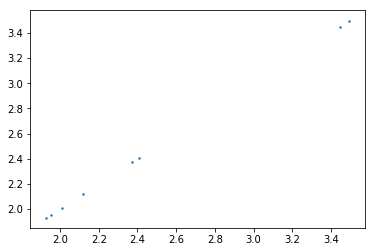

In [32]:
mapX_train = [x[0] for x in maps_train]
mapy_train = [x[1] for x in maps_train]
plt.scatter(mapX_train, mapy_train, s=2)

In [33]:
maps = []
for i in active_L_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    maps.append(prediction)

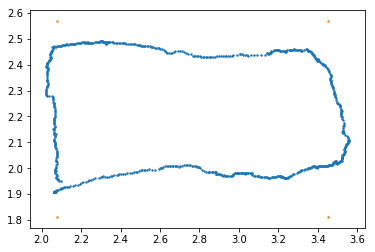

In [34]:
mapX = [x[0] for x in maps]
mapy = [x[1] for x in maps]
plt.scatter(mapX, mapy, s=2)
plt.scatter(room_x, room_y, s=2)

In [36]:
l_maps = []
for i in active_long_table_slide_DOA:
    testI = torch.from_numpy(i)
    prediction = model(testI.float()).tolist()
    l_maps.append(prediction)

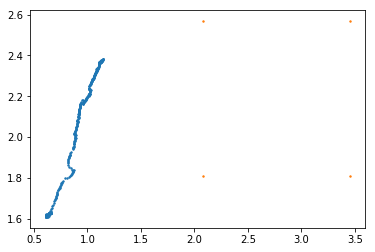

In [37]:
mapX_l = [x[0] for x in l_maps]
mapy_l = [x[1] for x in l_maps]
plt.scatter(mapX_l, mapy_l, s=2)
plt.scatter(room_x, room_y, s=2)